# Simulating a model with MaBoSS

In [1]:
%matplotlib inline
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Set up working environment for CoLoMoTo
import ginsim
import biolqm
import maboss
from colomoto_jupyter import tabulate # for fixpoint table display
from itertools import combinations # for iterating over sets
import matplotlib.pyplot as plt # for modifying plots
import pandas as pd # for the visualization of lists of states

Simulations:

* Forewords: The models are first constructed with GINsim then exported in MaBoSS format. In the cfg file, the initial states are set to 0. The max_time is set to 50 units of time. The files used are: supp_mat_model.bnd and supp_mat_model.bnd.cfg

* First sets of simulations: in this part,w e explore the effect of each of the presence of the ligands of the inhibitory immune checkpoints on a generic T cell. 

* Second sets of simulations: we simulate the treatments in the two step model separating the lymph node (LN) and the tumour microenvironment (TME) for both CD4+ and CD8+ eclls

* Third sets of simulations: we explore in the CD4+ cells, the impact of forcing the activity of the three transcription factors Tbet, FOXO1 and FOXP3 in CD4+ (3a) and CD8+ (3b)cells

* Fourth sets of simulations: we modulate the activity of the cytokines and explore the impact on the activity of the TF and on the TCR signalling activity

# 1. Definition of the model with TCR + Checkpoints + Cytokines 

In [2]:
# Use biolqm to visualize the stable states
fixed_WT3 = biolqm.load("supp_mat_model.zginml")

# Compute fixpoints
#fp3 = biolqm.fixpoints(fixed_WT3)
#print(len(fp3), "fixpoints")
#pd.DataFrame(fp3)

In [3]:
# Visualize the network
ginsim_WT3 = ginsim.load("supp_mat_model.zginml")
ginsim.show(ginsim_WT3)

In [4]:
# Set up the required files
bnd_file_3 ="supp_mat_model.bnd"
cfg_WT3 = "supp_mat_model.bnd.cfg"

# Load the Wild-Type model
WT3 = maboss.load(bnd_file_3, cfg_WT3)

Text(0.5, 1.0, 'WT')

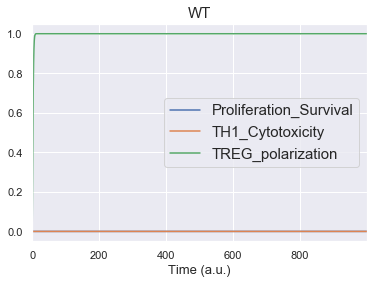

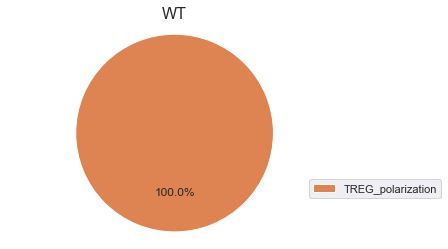

In [5]:
### All IC are 0
WT3.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT3 = WT3.run()
# Plot the results of the WT simulation
run_WT3.get_nodes_probtraj().plot(legend=True)
plt.title('WT', fontsize=15)
plt.legend(fontsize=15, loc="best")
plt.xlabel('Time (a.u.)', fontsize=13)


run_WT3.plot_piechart()
params = {'legend.fontsize': 15,
          'legend.handlelength': 1,'legend.loc':"upper right"}
plt.rcParams.update(params)
plt.title('WT', fontsize=16)

As a first analysis, we explore the model dynamics and investigate the impact of each immune checkpoint individually on the TCR cell fate in CD4+ cells and in CD8+ cells 

# 2. Impact of the individual ligands on the cell differentiation

We wish to test the effect of each ligand on the activation of TCR signalling. Both ligands for either CD4+ or D8+ will be artificially present. The purpose here is to estimate how strong each of the inhibitory immune checkpoints are

##### no checkpoints

Text(0.5, 1.0, 'Wild Type no checkpoints')

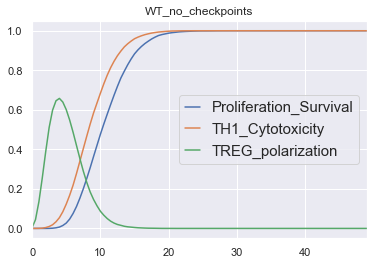

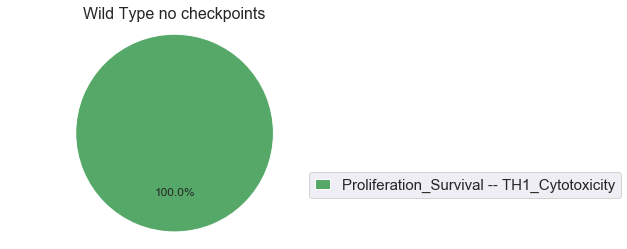

In [6]:
WT3_IC = maboss.copy_and_update_parameters(WT3, {'max_time':50})
    
WT3_IC.network.set_istate('Antigen',[0,1])
WT3_IC.network.set_istate('MHCI',[0,1])
WT3_IC.network.set_istate('MHCII',[0,1])

##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT3_IC.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT3_IC = WT3_IC.run()

# Plot the results of the WT simulation
run_WT3_IC.get_nodes_probtraj().plot(legend=True)
plt.title('WT_no_checkpoints')

run_WT3_IC.plot_piechart()
params = {'legend.fontsize': 15,
          'legend.handlelength': 1}
plt.rcParams.update(params)
plt.title('Wild Type no checkpoints', fontsize=16) 
#plt.savefig('WT_no_checkpoints.png')



# Select outputs for visualisation of the results
#WT3_IC.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
#run_WT3_IC = WT3_IC.run()
# Plot the results of the WT simulation
#run_WT3_IC.get_nodes_probtraj().plot(legend=True)
#plt.title('WT_IC_CTLA4')
#run_WT3_IC.plot_piechart()
#plt.title('WT_IC_CTLA4')

##### CTLA4 ON

Text(0.5, 1.0, 'Wild Type with CTLA4 ON')

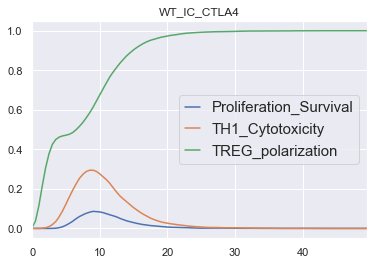

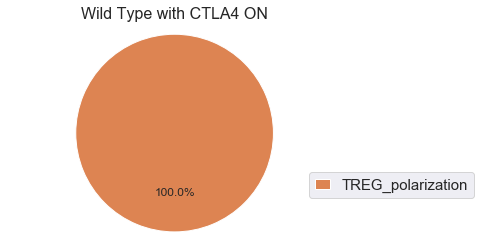

In [7]:
WT3_IC = maboss.copy_and_update_parameters(WT3, {'max_time':50})
    
WT3_IC.network.set_istate('Antigen',[0,1])
WT3_IC.network.set_istate('MHCI',[1,0])
WT3_IC.network.set_istate('MHCII',[0,1])
WT3_IC.network.set_istate('CD80_86',[0,1])

WT3_IC.network.set_istate('TIM3_L',[1,0])
WT3_IC.network.set_istate('LAG3_L',[1,0])
WT3_IC.network.set_istate('TIGIT_L',[1,0])
WT3_IC.network.set_istate('PD1_L',[1,0])

WT3_IC.network.set_istate('TNFRs_L',[1,0])
WT3_IC.network.set_istate('ICOS_L',[1,0]) 
#WT3_IC.network.set_istate('TNFRs_L',[0,1])
#WT3_IC.network.set_istate('ICOS_L',[0,1])

##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT3_IC.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT3_IC = WT3_IC.run()

# Plot the results of the WT simulation
run_WT3_IC.get_nodes_probtraj().plot(legend=True)
plt.title('WT_IC_CTLA4')
run_WT3_IC.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title('Wild Type with CTLA4 ON', fontsize=16) 



# Select outputs for visualisation of the results
#WT3_IC.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
#run_WT3_IC = WT3_IC.run()
# Plot the results of the WT simulation
#run_WT3_IC.get_nodes_probtraj().plot(legend=True)
#plt.title('WT_IC_CTLA4')
#run_WT3_IC.plot_piechart()
#plt.title('WT_IC_CTLA4')

##### PD1 ON

Text(0.5, 1.0, 'Wild Type with PD1 ON')

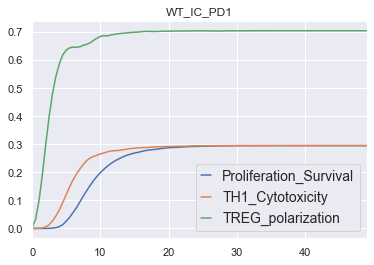

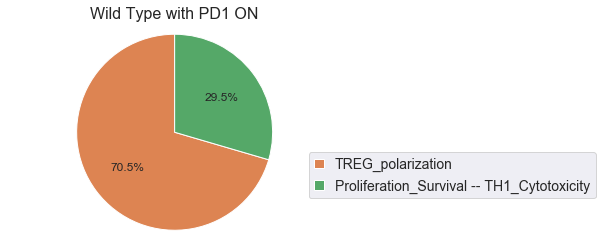

In [8]:
WT3_IC = maboss.copy_and_update_parameters(WT3, {'max_time':50})
    
WT3_IC.network.set_istate('Antigen',[0,1])
WT3_IC.network.set_istate('MHCI',[0,1])
WT3_IC.network.set_istate('MHCII',[0,1])
WT3_IC.network.set_istate('CD80_86',[1,0])

WT3_IC.network.set_istate('CD28',[0,1])

WT3_IC.network.set_istate('TIM3_L',[1,0])
WT3_IC.network.set_istate('LAG3_L',[1,0])
WT3_IC.network.set_istate('TIGIT_L',[1,0])
WT3_IC.network.set_istate('PD1_L',[0,1])
#WT3_IC.network.set_istate('TIM3_L',[0,1])
#WT3_IC.network.set_istate('LAG3_L',[0,1])
#WT3_IC.network.set_istate('TIGIT_L',[0,1])
#WT3_IC.network.set_istate('PD1_L',[0,1])

#WT3_Tum.network.set_istate('TIGIT_L',[1,0])
#WT3_Tum.network.set_istate('PD1_L',[1,0])
WT3_IC.network.set_istate('TNFRs_L',[1,0])
WT3_IC.network.set_istate('ICOS_L',[1,0]) 
#WT3_IC.network.set_istate('TNFRs_L',[0,1])
#WT3_IC.network.set_istate('ICOS_L',[0,1])

##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT3_IC.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT3_IC = WT3_IC.run()

# Plot the results of the WT simulation
run_WT3_IC.get_nodes_probtraj().plot(legend=True)
plt.title('WT_IC_PD1')
run_WT3_IC.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title('Wild Type with PD1 ON', fontsize=16) 


# Select outputs for visualisation of the results
#WT3_IC.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
#run_WT3_IC = WT3_IC.run()
# Plot the results of the WT simulation
#run_WT3_IC.get_nodes_probtraj().plot(legend=True)
#plt.title('WT_IC_PD1')
#run_WT3_IC.plot_piechart()
#plt.title('WT_IC_PD1')

##### TIGIT ON

Text(0.5, 1.0, 'Wild Type with TIGIT ON')

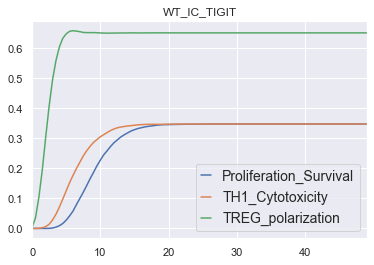

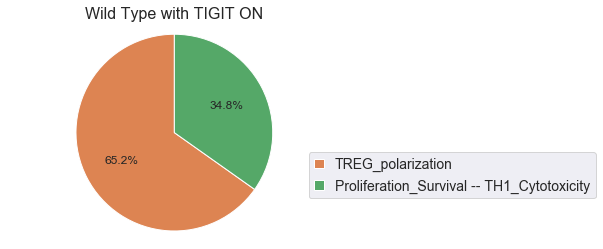

In [9]:
WT3_IC = maboss.copy_and_update_parameters(WT3, {'max_time':50})
    
WT3_IC.network.set_istate('Antigen',[0,1])
WT3_IC.network.set_istate('MHCI',[0,1])
WT3_IC.network.set_istate('MHCII',[0,1])
WT3_IC.network.set_istate('CD80_86',[1,0])

WT3_IC.network.set_istate('CD28',[0,1])

WT3_IC.network.set_istate('TIM3_L',[1,0])
WT3_IC.network.set_istate('LAG3_L',[1,0])
WT3_IC.network.set_istate('TIGIT_L',[0,1])
WT3_IC.network.set_istate('PD1_L',[1,0])

WT3_IC.network.set_istate('TNFRs_L',[1,0])
WT3_IC.network.set_istate('ICOS_L',[1,0]) 
#WT3_IC.network.set_istate('TNFRs_L',[0,1])
#WT3_IC.network.set_istate('ICOS_L',[0,1])

##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT3_IC.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT3_IC = WT3_IC.run()

# Plot the results of the WT simulation
run_WT3_IC.get_nodes_probtraj().plot(legend=True)
plt.title('WT_IC_TIGIT')
run_WT3_IC.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title('Wild Type with TIGIT ON', fontsize=16) 


# Select outputs for visualisation of the results
#WT3_IC.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
#run_WT3_IC = WT3_IC.run()
# Plot the results of the WT simulation
#run_WT3_IC.get_nodes_probtraj().plot(legend=True)
#plt.title('WT_IC_TIGIT')
#run_WT3_IC.plot_piechart()
#plt.title('WT_IC_TIGIT')

##### TIM3 ON

Text(0.5, 1.0, 'Wild Type with TIM3 ON')

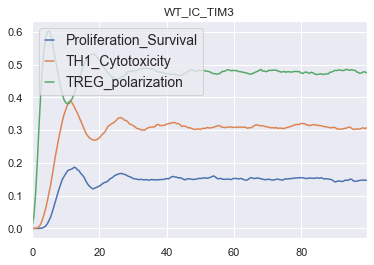

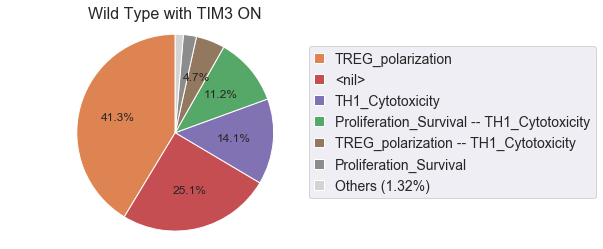

In [10]:
WT3_IC = maboss.copy_and_update_parameters(WT3, {'max_time':100})
    
WT3_IC.network.set_istate('Antigen',[0,1])
WT3_IC.network.set_istate('MHCI',[0,1])
WT3_IC.network.set_istate('MHCII',[0,1])
WT3_IC.network.set_istate('CD80_86',[1,0])

WT3_IC.network.set_istate('CD28',[0,1])


WT3_IC.network.set_istate('TIM3_L',[0,1])
WT3_IC.network.set_istate('LAG3_L',[1,0])
WT3_IC.network.set_istate('TIGIT_L',[1,0])
WT3_IC.network.set_istate('PD1_L',[1,0])

WT3_IC.network.set_istate('TNFRs_L',[1,0])
WT3_IC.network.set_istate('ICOS_L',[1,0]) 
#WT3_IC.network.set_istate('TNFRs_L',[0,1])
#WT3_IC.network.set_istate('ICOS_L',[0,1])

##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT3_IC.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT3_IC = WT3_IC.run()

# Plot the results of the WT simulation
run_WT3_IC.get_nodes_probtraj().plot(legend=True)
plt.title('WT_IC_TIM3')
run_WT3_IC.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title('Wild Type with TIM3 ON', fontsize=16) 


# Select outputs for visualisation of the results
#WT3_IC.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
#run_WT3_IC = WT3_IC.run()
# Plot the results of the WT simulation
#run_WT3_IC.get_nodes_probtraj().plot(legend=True)
#plt.title('WT_IC_TIM3')
#run_WT3_IC.plot_piechart()
#plt.title('WT_IC_TIM3')

##### LAG3 ON

Text(0.5, 1.0, 'Wild Type with LAG3 ON')

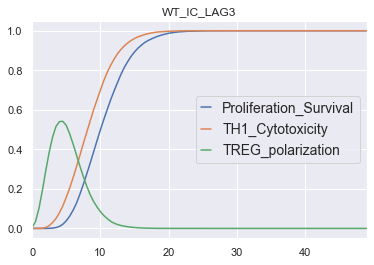

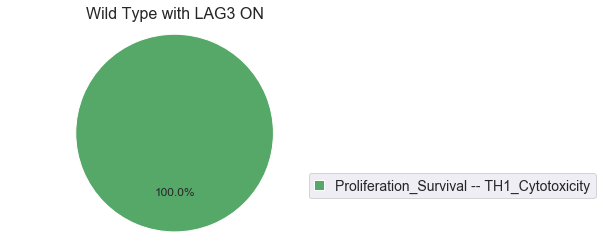

In [11]:
WT3_IC = maboss.copy_and_update_parameters(WT3, {'max_time':50})
    
WT3_IC.network.set_istate('Antigen',[0,1])
WT3_IC.network.set_istate('MHCI',[0,1])
WT3_IC.network.set_istate('MHCII',[0,1])
WT3_IC.network.set_istate('CD80_86',[1,0])

WT3_IC.network.set_istate('CD28',[0,1])

WT3_IC.network.set_istate('TIM3_L',[1,0])
WT3_IC.network.set_istate('LAG3_L',[0,1])
WT3_IC.network.set_istate('TIGIT_L',[1,0])
WT3_IC.network.set_istate('PD1_L',[1,0])

WT3_IC.network.set_istate('TNFRs_L',[1,0])
WT3_IC.network.set_istate('ICOS_L',[1,0]) 
#WT3_IC.network.set_istate('TNFRs_L',[0,1])
#WT3_IC.network.set_istate('ICOS_L',[0,1])

##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT3_IC.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT3_IC = WT3_IC.run()

# Plot the results of the WT simulation
run_WT3_IC.get_nodes_probtraj().plot(legend=True)
plt.title('WT_IC_LAG3')
run_WT3_IC.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title('Wild Type with LAG3 ON', fontsize=16) 



# Select outputs for visualisation of the results
#WT3_IC.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
#run_WT3_IC = WT3_IC.run()
# Plot the results of the WT simulation
#run_WT3_IC.get_nodes_probtraj().plot(legend=True)
#plt.title('WT_IC_LAG3')
#run_WT3_IC.plot_piechart()
#plt.title('WT_IC_LAG3')

Next, we explore the effect of LAG3. It has no inhibitory effect on the downstream TCR pathways. The presence of the ligands does not seem to be able to inhibit T cell activation. The reason is because Tbet is always ON and Tbet is ON because both STAT1 and GSK3 are absent and GSK3. By default, the value of Tbet will be 1.

To investigate further, we force the activation of the immune checkpoint by forcing its activity, thus not depending on the presence of the ligands or not.

Text(0.5, 1.0, 'CD4 cells - LAG3 constitutive')

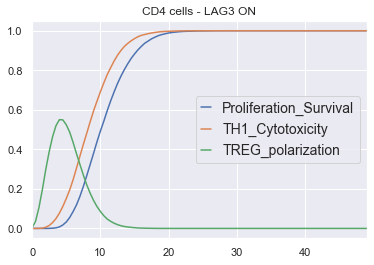

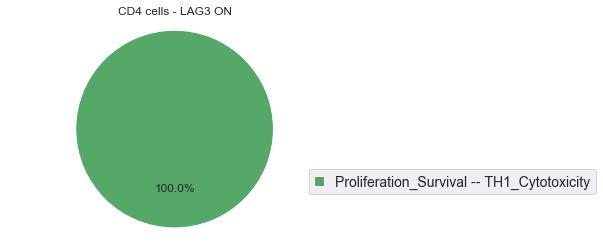

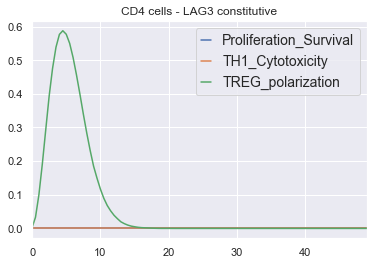

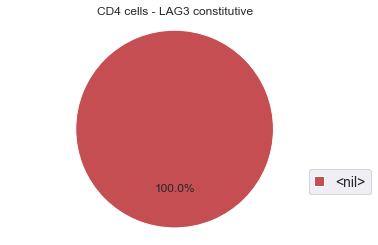

In [12]:
WT3_IC = maboss.copy_and_update_parameters(WT3_IC, {'max_time':50})
    
WT3_IC.network.set_istate('Antigen',[0,1])
WT3_IC.network.set_istate('MHCI',[0,1])
WT3_IC.network.set_istate('MHCII',[0,1])
WT3_IC.network.set_istate('CD80_86',[1,0])

WT3_IC.network.set_istate('CD28',[0,1])

WT3_IC.network.set_istate('TIM3_L',[1,0])
WT3_IC.network.set_istate('LAG3_L',[0,1])
WT3_IC.network.set_istate('TIGIT_L',[1,0])
WT3_IC.network.set_istate('PD1_L',[1,0])

WT3_IC.network.set_istate('TNFRs_L',[1,0])
WT3_IC.network.set_istate('ICOS_L',[1,0]) 
#WT3_IC.network.set_istate('TNFRs_L',[0,1])
#WT3_IC.network.set_istate('ICOS_L',[0,1])

##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT3_IC.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT3_IC = WT3_IC.run()
run_WT3_IC.get_nodes_probtraj().plot(legend=True)
plt.title('CD4 cells - LAG3 ON')
run_WT3_IC.plot_piechart()
plt.title('CD4 cells - LAG3 ON')

# Mutate LAG3 in cells not expressing any ligands
mut_LAG3_ON = maboss.copy_and_update_parameters(WT3_IC, {'max_time':50})
#mut_LAG3_ON.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))

mut_LAG3_ON.mutate("LAG3", "ON")
mutres_LAG3_ON = mut_LAG3_ON.run()
mutres_LAG3_ON.get_nodes_probtraj().plot(legend=True)
plt.title('CD4 cells - LAG3 constitutive')
mutres_LAG3_ON.plot_piechart()
plt.title('CD4 cells - LAG3 constitutive')

If the presence of LAG3 ligands at the beginning of the simulations shows no effect, the mutant expressing LAG3 constitutively has a full inhibitory effect. This shows that LAG3 is involved in negative feedback loops that may be more or less important depending on the expression / activity of the components that belong to this feedback. The qualitative nature of Boolean modelling does not permit a thorough interpretation of this effect. 
What we can conclude is that LAG3 is the less effective immune checkpoints in the current model.

# 2. Two-step model

## In the lymph node

We assume here that the cells are expressing CD80/86 in CD4+ cells (thus, with MHCII ON) as well as the positive immune checkpoints

In [13]:
### Simulation of the model with and without treatment
WT3_Lymph = maboss.copy_and_update_parameters(WT3, {'max_time':50})
    
WT3_Lymph.network.set_istate('Antigen',[0,1])
WT3_Lymph.network.set_istate('MHCI',[1,0])
WT3_Lymph.network.set_istate('MHCII',[0,1])
WT3_Lymph.network.set_istate('CD80_86',[0,1])

WT3_Lymph.network.set_istate('TIM3_L',[1,0])
WT3_Lymph.network.set_istate('LAG3_L',[1,0])
WT3_Lymph.network.set_istate('TIGIT_L',[1,0])
WT3_Lymph.network.set_istate('PD1_L',[1,0])
#WT3_Lymph.network.set_istate('TIM3_L',[0,1])
#WT3_Lymph.network.set_istate('LAG3_L',[0,1])
#WT3_Lymph.network.set_istate('TIGIT_L',[0,1])
#WT3_Lymph.network.set_istate('PD1_L',[0,1])

#WT3_Tum.network.set_istate('TIGIT_L',[1,0])
#WT3_Tum.network.set_istate('PD1_L',[1,0])
WT3_Lymph.network.set_istate('TNFRs_L',[0,1])
WT3_Lymph.network.set_istate('ICOS_L',[0,1]) 
#WT3_Lymph.network.set_istate('TNFRs_L',[0,1])
#WT3_Lymph.network.set_istate('ICOS_L',[0,1])


Text(0.5, 1.0, 'WT_Lymph')

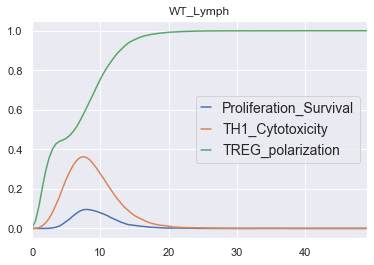

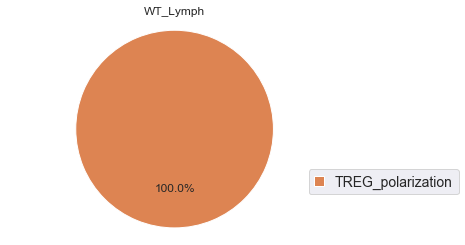

In [14]:
##### Visualize the phenotypes
# Select outputs for visualisation of the results
WT3_Lymph.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))
# Run the model
run_WT3_Lymph = WT3_Lymph.run()

# Plot the results of the WT simulation
run_WT3_Lymph.get_nodes_probtraj().plot(legend=True)
plt.title('WT_Lymph')
run_WT3_Lymph.plot_piechart()
plt.title('WT_Lymph')

Results: the T-cells do not proliferate efficiently. We conclude that when CTLA4 is present there is no efficient clonal expansion

We simulate the effect of the anti-CTLA4 treatments in the lymph nodes

Text(0.5, 1.0, 'anti-CTLA4_Lymph')

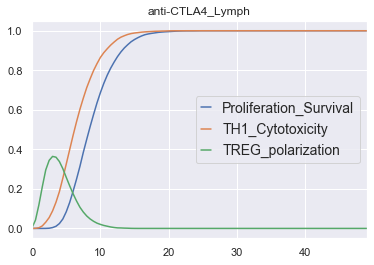

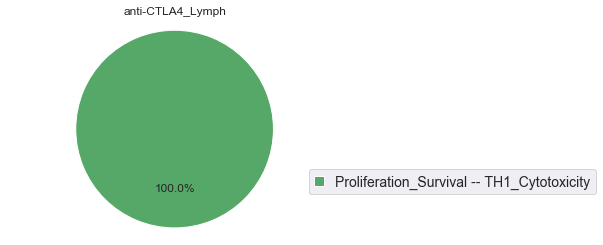

In [15]:
# Mutate CTLA4
mut_CTLA4_OFF = maboss.copy_and_update_parameters(WT3_Lymph, {'max_time':50})
mut_CTLA4_OFF.mutate("CTLA4", "OFF")
mutres_CTLA4_OFF = mut_CTLA4_OFF.run()
# Plot the results of the CTLA4 treatment simulation
mutres_CTLA4_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('anti-CTLA4_Lymph')
mutres_CTLA4_OFF.plot_piechart()
plt.title('anti-CTLA4_Lymph')

Results: T-cells get over-activated after the anti-CTLA4 treatment in the lymph nodes

Text(0.5, 1.0, 'CTLA4 and PD1 OFF')

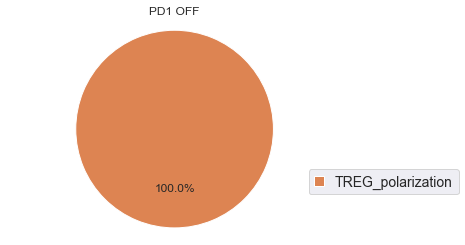

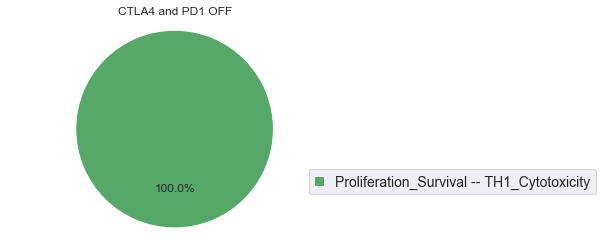

In [16]:
# Mutate CTLA4 and PD1
mut_PD1 = WT3_Lymph.copy()
mut_PD1.mutate("PD1", "OFF")
mutres_PD1 = mut_PD1.run()
mutres_PD1.plot_piechart()
plt.title('PD1 OFF')
#mutres_PD1.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1
mut_PD1_CTLA4 = mut_CTLA4_OFF.copy()
mut_PD1_CTLA4.mutate("PD1", "OFF")
mutres_PD1_CTLA4 = mut_PD1_CTLA4.run()
mutres_PD1_CTLA4.plot_piechart()
plt.title('CTLA4 and PD1 OFF')
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

The anti-PD1 treatment has obviously no effect in the lymph node

If we visualize the pathways that get activated, we see that NFkB and MAPK only are fully activated when CTLA4 ligands are present

Text(0.5, 1.0, 'anti-CTLA4_Lymph')

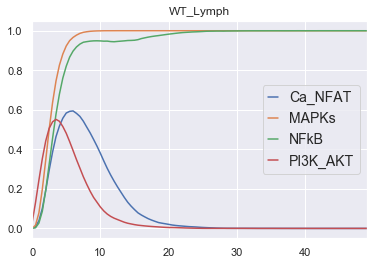

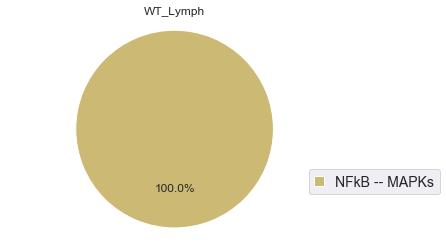

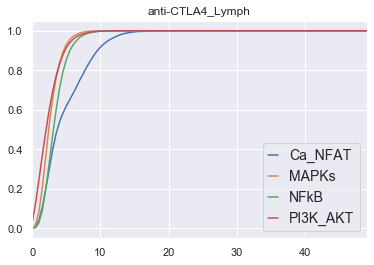

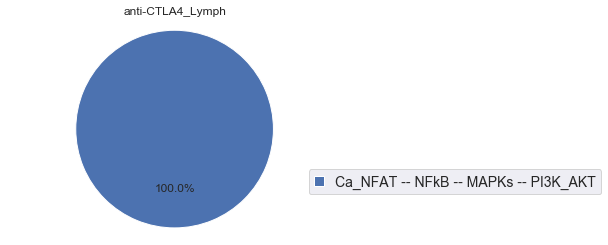

In [17]:
##### Visualize the pathways
WT3_Lymph.network.set_output(('PI3K_AKT','Ca_NFAT','MAPKs','NFkB'))
# Run the model
run_WT3_Lymph = WT3_Lymph.run()

# Plot the results of the WT simulation
run_WT3_Lymph.get_nodes_probtraj().plot(legend=True)
plt.title('WT_Lymph')
run_WT3_Lymph.plot_piechart()
plt.title('WT_Lymph')

# Mutate CTLA4
mut_CTLA4_OFF = maboss.copy_and_update_parameters(WT3_Lymph, {'max_time':50})
mut_CTLA4_OFF.mutate("CTLA4", "OFF")
mutres_CTLA4_OFF = mut_CTLA4_OFF.run()
# Plot the results of the CTLA4 treatment simulation
mutres_CTLA4_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('anti-CTLA4_Lymph')
mutres_CTLA4_OFF.plot_piechart()
plt.title('anti-CTLA4_Lymph')

Conclusion: the 4 pathways are activated in response to the anti-CTLA4 treatment

Text(0.5, 1.0, 'CTLA4_no_treatment')

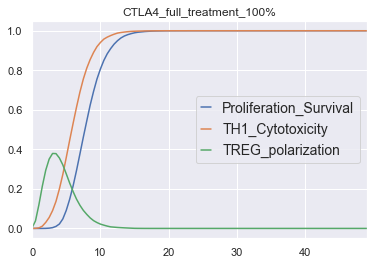

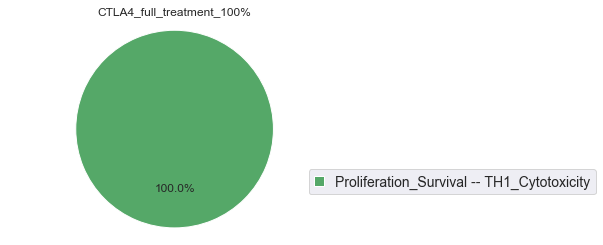

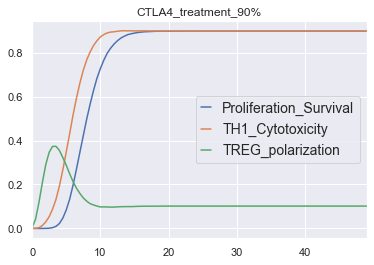

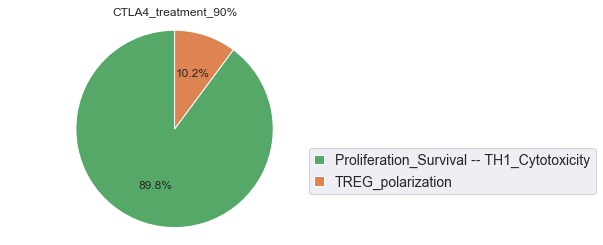

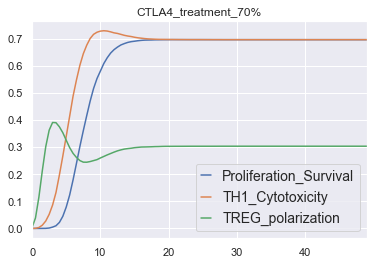

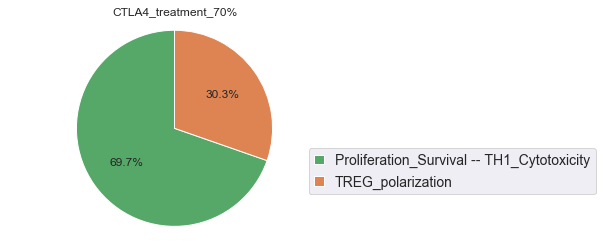

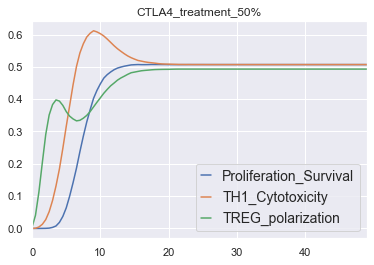

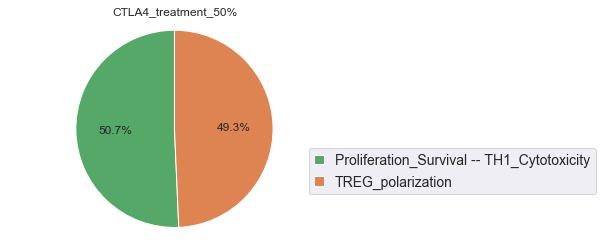

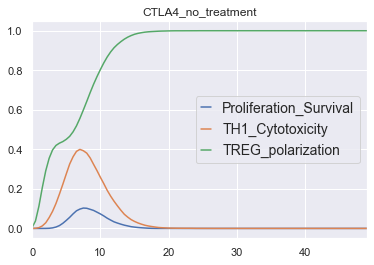

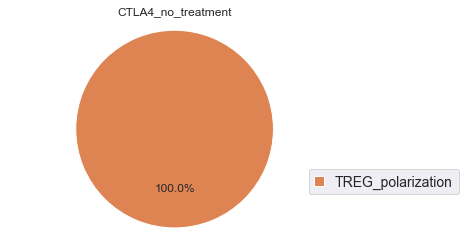

In [18]:
##### Visualize the phenotypes
# Select outputs for visualisation of the results

gradual_CD4 = maboss.copy_and_update_parameters(WT3_Lymph, {'max_time':50})
    
gradual_CD4.network.set_istate('Antigen',[0,1])
gradual_CD4.network.set_istate('MHCI',[0,1])
gradual_CD4.network.set_istate('MHCII',[1,0])
gradual_CD4.network.set_istate('CD80_86',[0,1])

gradual_CD4.network.set_istate('TIM3_L',[1,0])
gradual_CD4.network.set_istate('LAG3_L',[1,0])
gradual_CD4.network.set_istate('TIGIT_L',[1,0])
gradual_CD4.network.set_istate('PD1_L',[1,0])
gradual_CD4.network.set_istate('TNFRs_L',[0,1])
gradual_CD4.network.set_istate('ICOS_L',[0,1]) 

gradual_CD4.network.set_output(('TREG_polarization','Proliferation_Survival','TH1_Cytotoxicity'))


### 100% 
gradual_CTLA4_treatment_100 = maboss.copy_and_update_parameters(gradual_CD4, {'max_time':50})
gradual_CTLA4_treatment_100.network.set_istate('anti_CTLA4', [0,1])


# Run the model
gradual_CTLA4_treatment_100 = gradual_CTLA4_treatment_100.run()

gradual_CTLA4_treatment_100.get_nodes_probtraj().plot(legend=True)
plt.title('CTLA4_full_treatment_100%')
gradual_CTLA4_treatment_100.plot_piechart()
plt.title('CTLA4_full_treatment_100%')



### 90%
gradual_CTLA4_treatment_90 = maboss.copy_and_update_parameters(gradual_CD4, {'max_time':50})
gradual_CTLA4_treatment_90.network.set_istate('anti_CTLA4', [0.1,0.9])


# Run the model
gradual_CTLA4_treatment_90 = gradual_CTLA4_treatment_90.run()

gradual_CTLA4_treatment_90.get_nodes_probtraj().plot(legend=True)
plt.title('CTLA4_treatment_90%')
gradual_CTLA4_treatment_90.plot_piechart()
plt.title('CTLA4_treatment_90%')


### 70%
gradual_CTLA4_treatment_70 = maboss.copy_and_update_parameters(gradual_CD4, {'max_time':50})
gradual_CTLA4_treatment_70.network.set_istate('anti_CTLA4', [0.3,0.7])

# Run the model
gradual_CTLA4_treatment_70 = gradual_CTLA4_treatment_70.run()

gradual_CTLA4_treatment_70.get_nodes_probtraj().plot(legend=True)
plt.title('CTLA4_treatment_70%')
gradual_CTLA4_treatment_70.plot_piechart()
plt.title('CTLA4_treatment_70%')


### 50%
gradual_CTLA4_treatment_50 = maboss.copy_and_update_parameters(gradual_CD4, {'max_time':50})
gradual_CTLA4_treatment_50.network.set_istate('anti_CTLA4', [0.5,0.5])

# Run the model
gradual_CTLA4_treatment_50 = gradual_CTLA4_treatment_50.run()

gradual_CTLA4_treatment_50.get_nodes_probtraj().plot(legend=True)
plt.title('CTLA4_treatment_50%')
gradual_CTLA4_treatment_50.plot_piechart()
plt.title('CTLA4_treatment_50%')


### 0%
gradual_CTLA4_treatment_0 = maboss.copy_and_update_parameters(gradual_CD4, {'max_time':50})
gradual_CTLA4_treatment_0.network.set_istate('anti_CTLA4', [1,0])

# Run the model
gradual_CTLA4_treatment_0 = gradual_CTLA4_treatment_0.run()

gradual_CTLA4_treatment_0.get_nodes_probtraj().plot(legend=True)
plt.title('CTLA4_no_treatment')
gradual_CTLA4_treatment_0.plot_piechart()
plt.title('CTLA4_no_treatment')

Next we explore the two-step process when cells are treated by anti-CTLA4 and anti_PD1 treatment

# In the TME

When the T-cells arrive in the TME, their population has expanded if everything went well during the priming of T-cells in the lymph node. The population of T-cells are then in contact with tumours presenting ligands (all or combination of ligands). 

What if they are not in contact with all ligands? The simulations would correspond to the conditions of the lymph nodes with a treatment of CTLA4. Thus, we will not show the simulations for the presence of individual ligands in the TME but we will consider that all ligands are expressed.

We test the conditions in CD4+ and CD8+ cells independently

## CD4+ cells

We test two conditions, when the ligands for PD1 and TNFRs and ICOS are present and when all ligands are present.


It is known that, in the TME, CTLA4 is absent because it has been degraded after priming, but the ligands CD80/CD86 are present and able to activate CD28 downstream pathway. In the model, the ligands CD80/86 are able to activate both CD28 and CTLA4 in a competitive manner. When CTLA4 is present, it is able to "win over" CD28. To cope with this issue, we artifically turn off CTLA4, but we could also increase the degradation rate, which would be equivalent. For simplicity, we "mutate" CTLA4 to allow the activation of CD28 in CD4+ cells

Text(0.5, 1.0, 'CD4 - TME')

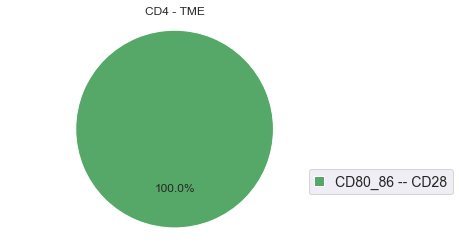

In [19]:
# For all nodes of the network, set the initial state to random
WT3_CD4 = maboss.copy_and_update_parameters(WT3_Lymph, {'max_time':100})

# Select outputs for visualisation of the results
WT3_CD4.network.set_output(('CTLA4','CD28', 'CD80_86'))
WT3_CD4.mutate("CTLA4", "OFF")
WT3_res_CD4 = WT3_CD4.run()
# Plot the results of the CTLA4 treatment simulation
#WT3_res_CD4.get_nodes_probtraj().plot(legend=True)
#plt.title('CD4 - TME')
WT3_res_CD4.plot_piechart()
plt.title('CD4 - TME')

#### CD4: PD1 ligand present only

Text(0.5, 1.0, 'WT_CD4_PD1')

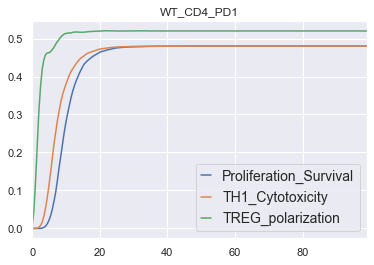

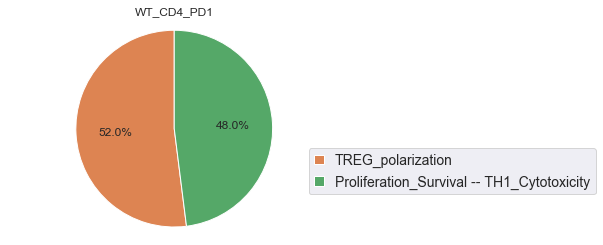

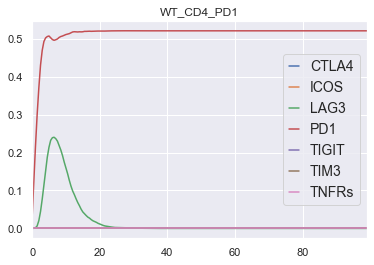

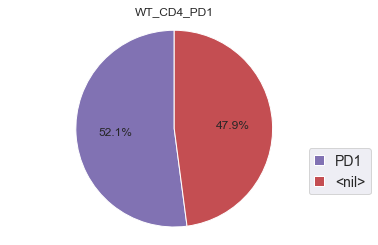

In [20]:
# For all nodes of the network, set the initial state to random
WT3_Tum_CD4_PD1 = maboss.copy_and_update_parameters(WT3_CD4, {'max_time':100})

WT3_Tum_CD4_PD1.network.set_istate('Antigen',[0,1])
WT3_Tum_CD4_PD1.network.set_istate('MHCI',[1,0])
WT3_Tum_CD4_PD1.network.set_istate('MHCII',[0,1])
WT3_Tum_CD4_PD1.network.set_istate('CD80_86',[0,1])

WT3_Tum_CD4_PD1.network.set_istate('TIM3_L',[1,0])
WT3_Tum_CD4_PD1.network.set_istate('LAG3_L',[1,0])
WT3_Tum_CD4_PD1.network.set_istate('TIGIT_L',[1,0])
WT3_Tum_CD4_PD1.network.set_istate('PD1_L',[0,1])
WT3_Tum_CD4_PD1.network.set_istate('TNFRs_L',[1,0])
WT3_Tum_CD4_PD1.network.set_istate('ICOS_L',[1,0])

# Select outputs for visualisation of the results
WT3_Tum_CD4_PD1.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
# Run the model
run_WT3_Tum_CD4_PD1 = WT3_Tum_CD4_PD1.run()


# Plot the results of the WT simulation
run_WT3_Tum_CD4_PD1.get_nodes_probtraj().plot(legend=True)
plt.title('WT_CD4_PD1')
run_WT3_Tum_CD4_PD1.plot_piechart()
plt.title('WT_CD4_PD1')

# Select outputs for visualisation of the results
WT3_Tum_CD4_PD1.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

# Run the model
run_WT3_Tum_CD4_PD1 = WT3_Tum_CD4_PD1.run()
# Plot the results of the WT simulation
run_WT3_Tum_CD4_PD1.get_nodes_probtraj().plot(legend=True)
plt.title('WT_CD4_PD1')
run_WT3_Tum_CD4_PD1.plot_piechart()
plt.title('WT_CD4_PD1')


#### CD4: PD1 ligand present and TNFRs and ICOS ligands

Text(0.5, 1.0, 'WT_CD4_PD1_pos_IC')

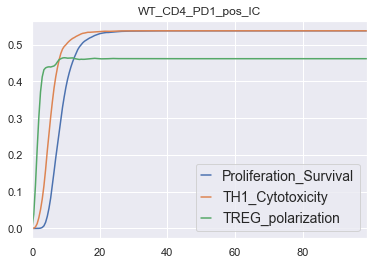

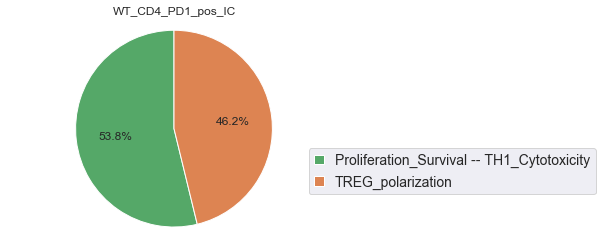

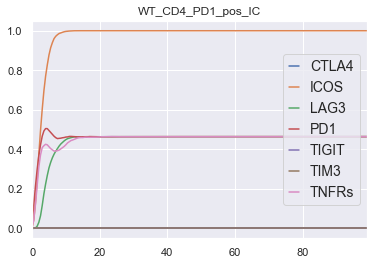

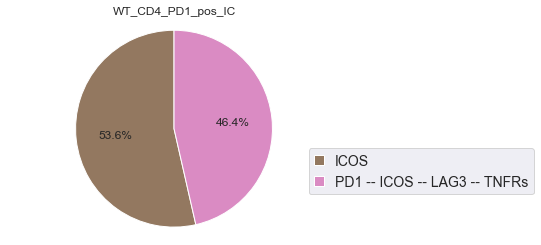

In [21]:
# For all nodes of the network, set the initial state to random
WT3_Tum_CD4_PD1_pos_IC = maboss.copy_and_update_parameters(WT3_CD4, {'max_time':100})

WT3_Tum_CD4_PD1_pos_IC.network.set_istate('Antigen',[0,1])
WT3_Tum_CD4_PD1_pos_IC.network.set_istate('MHCI',[1,0])
WT3_Tum_CD4_PD1_pos_IC.network.set_istate('MHCII',[0,1])
WT3_Tum_CD4_PD1_pos_IC.network.set_istate('CD80_86',[0,1])

WT3_Tum_CD4_PD1_pos_IC.network.set_istate('TIM3_L',[1,0])
WT3_Tum_CD4_PD1_pos_IC.network.set_istate('LAG3_L',[1,0])
WT3_Tum_CD4_PD1_pos_IC.network.set_istate('TIGIT_L',[1,0])
WT3_Tum_CD4_PD1_pos_IC.network.set_istate('PD1_L',[0,1])
WT3_Tum_CD4_PD1_pos_IC.network.set_istate('TNFRs_L',[0,1])
WT3_Tum_CD4_PD1_pos_IC.network.set_istate('ICOS_L',[0,1])

# Select outputs for visualisation of the results
WT3_Tum_CD4_PD1_pos_IC.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
# Run the model
run_WT3_Tum_CD4_PD1_pos_IC = WT3_Tum_CD4_PD1_pos_IC.run()


# Plot the results of the WT simulation
run_WT3_Tum_CD4_PD1_pos_IC.get_nodes_probtraj().plot(legend=True)
plt.title('WT_CD4_PD1_pos_IC')
run_WT3_Tum_CD4_PD1_pos_IC.plot_piechart()
plt.title('WT_CD4_PD1_pos_IC')

# Select outputs for visualisation of the results
WT3_Tum_CD4_PD1_pos_IC.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

# Run the model
run_WT3_Tum_CD4_PD1_pos_IC = WT3_Tum_CD4_PD1_pos_IC.run()
# Plot the results of the WT simulation
run_WT3_Tum_CD4_PD1_pos_IC.get_nodes_probtraj().plot(legend=True)
plt.title('WT_CD4_PD1_pos_IC')
run_WT3_Tum_CD4_PD1_pos_IC.plot_piechart()
plt.title('WT_CD4_PD1_pos_IC')


Results: There is a mixture of Treg and Th1 cells when PD1 ligands and activating immune checkpoints are present. The proportion of Th1 is slightly increased when we consider that the positive immune checkpoints are present in the simulation. 

#### CD4 simulation: MHCII is ON and with all ligands ON

Text(0.5, 1.0, 'CD4 cells - TME - all checkpoints')

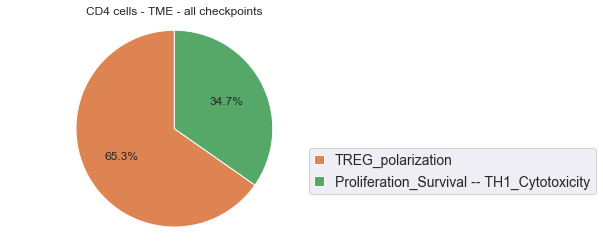

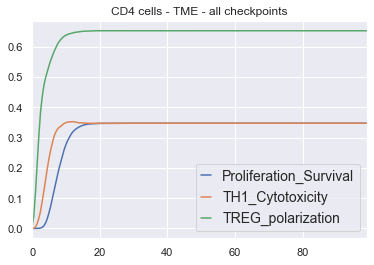

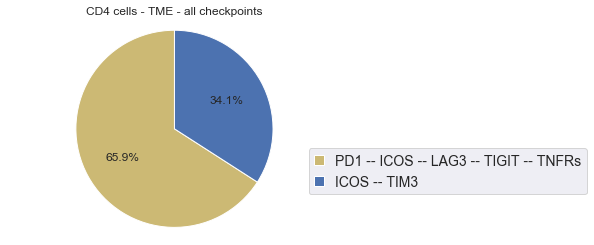

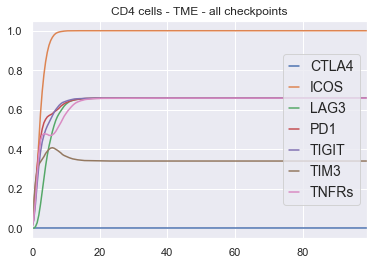

In [22]:
WT3_Tum_CD4 = maboss.copy_and_update_parameters(WT3_CD4, {'max_time':100})
    
WT3_Tum_CD4.network.set_istate('Antigen',[0,1])
WT3_Tum_CD4.network.set_istate('MHCII',[0,1])
WT3_Tum_CD4.network.set_istate('MHCI',[1,0])
WT3_Tum_CD4.network.set_istate('CD80_86',[0,1])

WT3_Tum_CD4.network.set_istate('TIM3_L',[0,1])
WT3_Tum_CD4.network.set_istate('LAG3_L',[0,1])
WT3_Tum_CD4.network.set_istate('TIGIT_L',[0,1])
WT3_Tum_CD4.network.set_istate('PD1_L',[0,1])
WT3_Tum_CD4.network.set_istate('TNFRs_L',[0,1])
WT3_Tum_CD4.network.set_istate('ICOS_L',[0,1])

# Select outputs for visualisation of the results
WT3_Tum_CD4.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
# Run the model
run_WT3_Tum_CD4 = WT3_Tum_CD4.run()
run_WT3_Tum_CD4.plot_piechart()
plt.title('CD4 cells - TME - all checkpoints')
run_WT3_Tum_CD4.get_nodes_probtraj().plot(legend=True)
plt.title('CD4 cells - TME - all checkpoints')


# Select outputs for visualisation of the results
WT3_Tum_CD4.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
# Run the model
run_WT3_Tum_CD4 = WT3_Tum_CD4.run()
run_WT3_Tum_CD4.plot_piechart()
plt.title('CD4 cells - TME - all checkpoints')
run_WT3_Tum_CD4.get_nodes_probtraj().plot(legend=True)
plt.title('CD4 cells - TME - all checkpoints')

Results: Th1 cells have TIM3 ligands present and the Treg have PD1, LAG3, TIGIT ligands present. 

#### Simulation of a possible treatment for the situation where all ligands are present

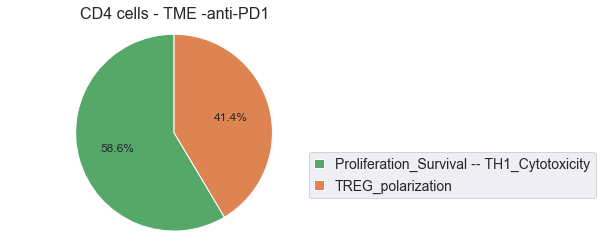

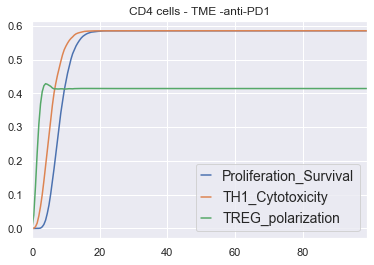

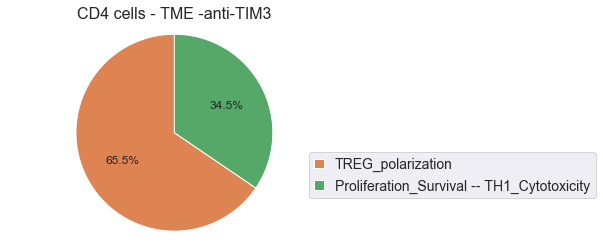

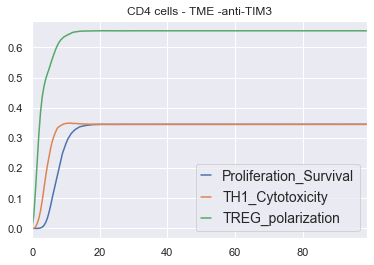

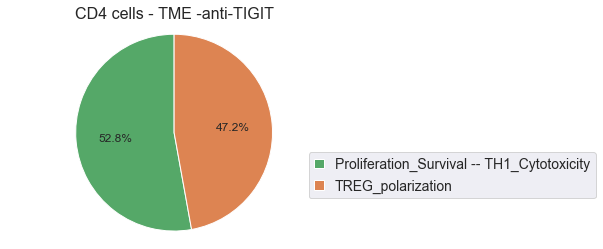

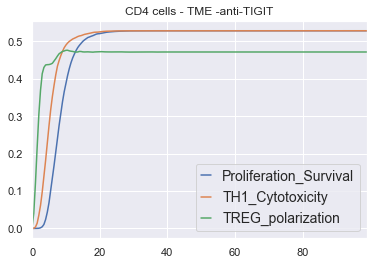

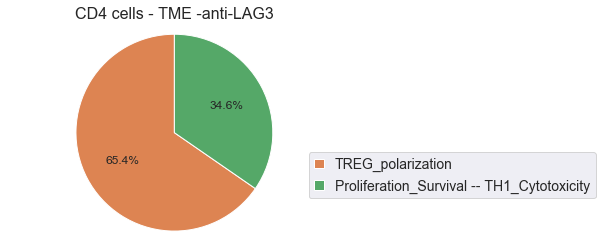

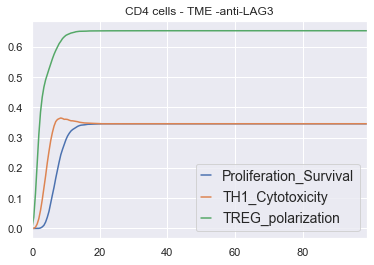

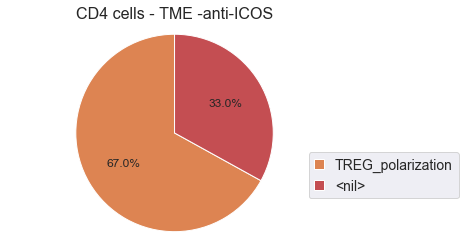

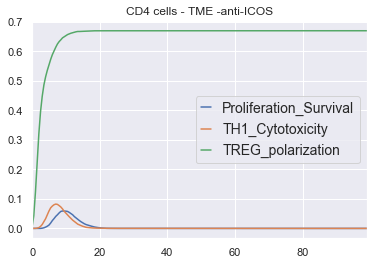

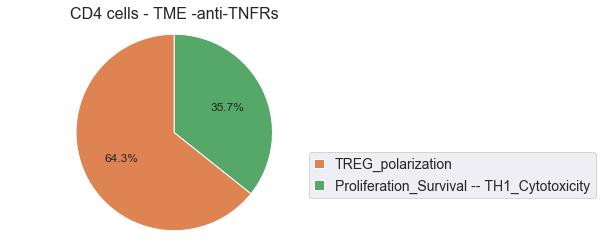

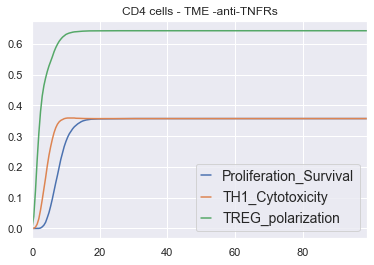

In [23]:
nodes_OFF = ['PD1','TIM3','TIGIT','LAG3','ICOS','TNFRs']

WT3_Tum_CD4.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))

# Simulate genes with loss of function
for mutant in nodes_OFF:
#    print(mutant, end=' ')
    mut_sim_double = WT3_Tum_CD4.copy()
    mut_sim_double.mutate(mutant, "OFF")
    mut_res = mut_sim_double.run()
    mut_res.plot_piechart(embed_labels=False, autopct=6)
    params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
    plt.rcParams.update(params)

    plt.title('CD4 cells - TME -' + "anti-%s" % mutant, fontsize=16)

    mut_res.get_nodes_probtraj().plot(legend=True)
    plt.title('CD4 cells - TME -' + "anti-%s" % mutant)

#### Test the effect of LAG3, TIM3 and TIGIT on the anti-PD1 treatment

Text(0.5, 1.0, 'PD1 and TIGIT OFF')

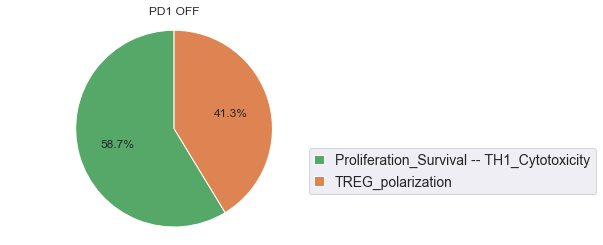

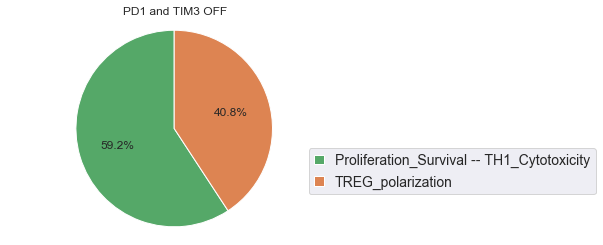

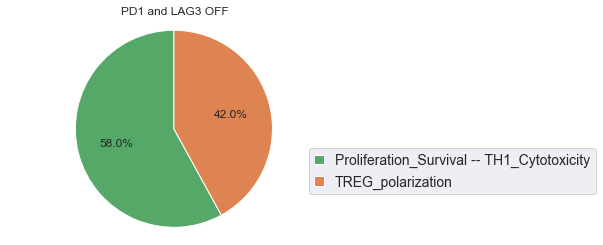

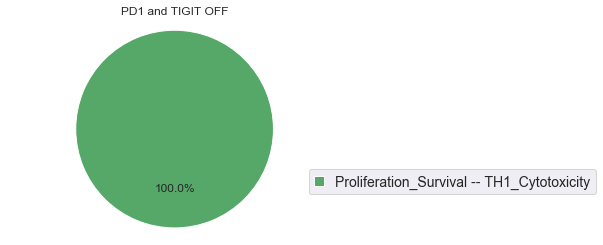

In [24]:
# Mutate PD1
mut_PD1 = WT3_Tum_CD4.copy()
mut_PD1.mutate("PD1", "OFF")
mutres_PD1 = mut_PD1.run()
mutres_PD1.plot_piechart()
plt.title('PD1 OFF')
#mutres_PD1.get_nodes_probtraj().plot(legend=True)

# Mutate PD1 and TIM3
mut_PD1_TIM3 = mut_PD1.copy()
mut_PD1_TIM3.mutate("TIM3", "OFF")
mutres_PD1_TIM3 = mut_PD1_TIM3.run()
mutres_PD1_TIM3.plot_piechart()
plt.title('PD1 and TIM3 OFF')
#mutres_PD1.get_nodes_probtraj().plot(legend=True)

# Mutate PD1 and LAG3
mut_PD1_LAG3 = mut_PD1.copy()
mut_PD1_LAG3.mutate("LAG3", "OFF")
mutres_PD1_LAG3 = mut_PD1_LAG3.run()
mutres_PD1_LAG3.plot_piechart()
plt.title('PD1 and LAG3 OFF')
#mutres_PD1.get_nodes_probtraj().plot(legend=True)

# Mutate PD1 and TIGIT
mut_PD1_TIGIT = mut_PD1.copy()
mut_PD1_TIGIT.mutate("TIGIT", "OFF")
mutres_PD1_TIGIT = mut_PD1_TIGIT.run()
mutres_PD1_TIGIT.plot_piechart()
plt.title('PD1 and TIGIT OFF')
#mutres_PD1.get_nodes_probtraj().plot(legend=True)

Conclusion: A double combination of PD1 and TIGIT result in full activation of TH1 cells. TM3 and LAG3 have no effect.

## CD8+ cells

We perform the same simulations as above but in the case of CD8+ cells. For this case, we set MHCI to 1 and CD80_86 are OFF

#### CD8: PD1 ligand present

Text(0.5, 1.0, 'CD8 cells - TME - PD1')

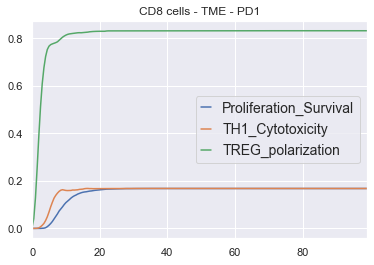

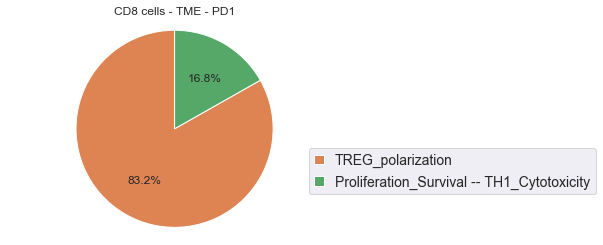

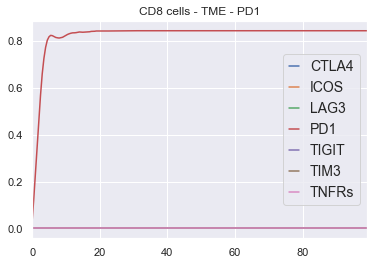

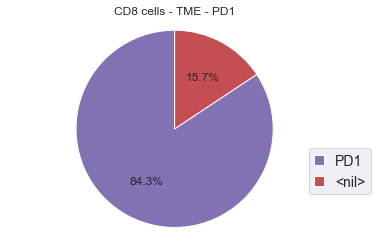

In [25]:
# For all nodes of the network, set the initial state to random
WT3_Tum_CD8_PD1 = maboss.copy_and_update_parameters(WT3_Lymph, {'max_time':100})

WT3_Tum_CD8_PD1.network.set_istate('Antigen',[0,1])
WT3_Tum_CD8_PD1.network.set_istate('MHCII',[1,0])
WT3_Tum_CD8_PD1.network.set_istate('MHCI',[0,1])
WT3_Tum_CD8_PD1.network.set_istate('CD80_86',[1,0])

WT3_Tum_CD8_PD1.network.set_istate('TIM3_L',[1,0])
WT3_Tum_CD8_PD1.network.set_istate('LAG3_L',[1,0])
WT3_Tum_CD8_PD1.network.set_istate('TIGIT_L',[1,0])
WT3_Tum_CD8_PD1.network.set_istate('PD1_L',[0,1])
WT3_Tum_CD8_PD1.network.set_istate('TNFRs_L',[1,0])
WT3_Tum_CD8_PD1.network.set_istate('ICOS_L',[1,0])

# Select outputs for visualisation of the results
WT3_Tum_CD8_PD1.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))

# Run the model
run_WT3_Tum_CD8_PD1 = WT3_Tum_CD8_PD1.run()
run_WT3_Tum_CD8_PD1.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - TME - PD1')
run_WT3_Tum_CD8_PD1.plot_piechart()
plt.title('CD8 cells - TME - PD1')

# Select outputs for visualisation of the results
WT3_Tum_CD8_PD1.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

# Run the model
run_WT3_Tum_CD8_PD1 = WT3_Tum_CD8_PD1.run()
run_WT3_Tum_CD8_PD1.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - TME - PD1')
run_WT3_Tum_CD8_PD1.plot_piechart()
plt.title('CD8 cells - TME - PD1')

#### CD8: PD1 ligand present and TNFRs and ICOS ligands

Text(0.5, 1.0, 'CD8 cells - TME - PD1_pos_IC ON')

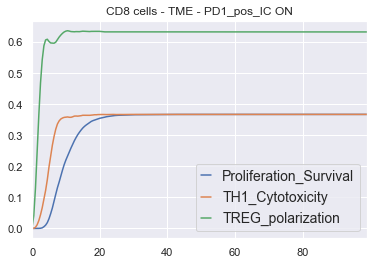

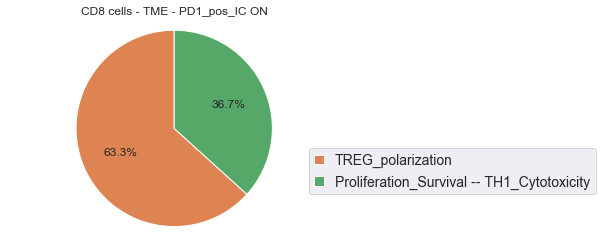

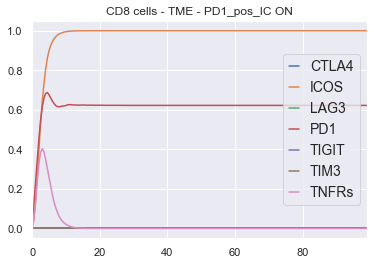

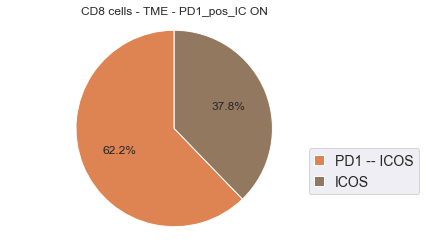

In [26]:
# For all nodes of the network, set the initial state to random
WT3_Tum_CD8_PD1_pos_IC = maboss.copy_and_update_parameters(WT3_Lymph, {'max_time':100})

WT3_Tum_CD8_PD1_pos_IC.network.set_istate('Antigen',[0,1])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('MHCI',[0,1])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('MHCII',[1,0])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('CD80_86',[1,0])

WT3_Tum_CD8_PD1_pos_IC.network.set_istate('TIM3_L',[1,0])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('LAG3_L',[1,0])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('TIGIT_L',[1,0])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('PD1_L',[0,1])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('TNFRs_L',[0,1])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('ICOS_L',[0,1])


# Select outputs for visualisation of the results
WT3_Tum_CD8_PD1_pos_IC.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))

# Run the model
run_WT3_Tum_CD8_PD1_pos_IC = WT3_Tum_CD8_PD1_pos_IC.run()
run_WT3_Tum_CD8_PD1_pos_IC.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - TME - PD1_pos_IC ON')
run_WT3_Tum_CD8_PD1_pos_IC.plot_piechart()
plt.title('CD8 cells - TME - PD1_pos_IC ON')


# Select outputs for visualisation of the results
WT3_Tum_CD8_PD1_pos_IC.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

# Run the model
run_WT3_Tum_CD8_PD1_pos_IC = WT3_Tum_CD8_PD1_pos_IC.run()
run_WT3_Tum_CD8_PD1_pos_IC.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - TME - PD1_pos_IC ON')
run_WT3_Tum_CD8_PD1_pos_IC.plot_piechart()
plt.title('CD8 cells - TME - PD1_pos_IC ON')


#### CD8 simulation: CD80_86 OFF, MHCI is ON and with all ligands ON

Text(0.5, 1.0, 'CD8 cells - TME - all checkpoints')

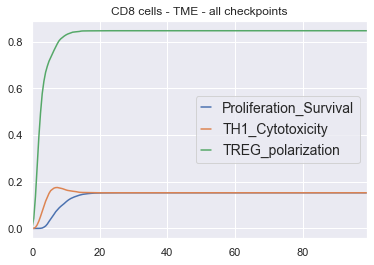

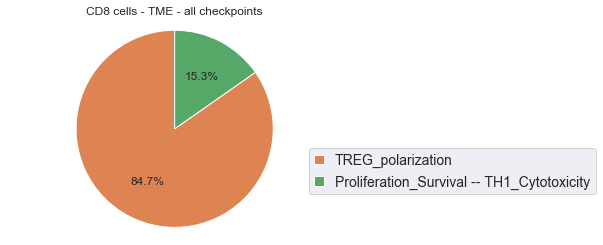

In [27]:
WT3_Tum_CD8 = maboss.copy_and_update_parameters(WT3_Lymph, {'max_time':100})
    
WT3_Tum_CD8.network.set_istate('Antigen',[0,1])
WT3_Tum_CD8.network.set_istate('MHCI',[0,1])
WT3_Tum_CD8.network.set_istate('MHCII',[1,0])
WT3_Tum_CD8.network.set_istate('CD80_86',[1,0])

WT3_Tum_CD8.network.set_istate('TIM3_L',[0,1])
WT3_Tum_CD8.network.set_istate('LAG3_L',[0,1])
WT3_Tum_CD8.network.set_istate('TIGIT_L',[0,1])
WT3_Tum_CD8.network.set_istate('PD1_L',[0,1])
WT3_Tum_CD8.network.set_istate('TNFRs_L',[0,1])
WT3_Tum_CD8.network.set_istate('ICOS_L',[0,1])

# Select outputs for visualisation of the results
WT3_Tum_CD8.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))

# Run the model
run_WT3_Tum_CD8 = WT3_Tum_CD8.run()
run_WT3_Tum_CD8.get_nodes_probtraj().plot(legend=True)
plt.title('CD8 cells - TME - all checkpoints')
run_WT3_Tum_CD8.plot_piechart()
plt.title('CD8 cells - TME - all checkpoints')

Conclusion:

#### Simulation of the treatment for the situation where all ligands are present

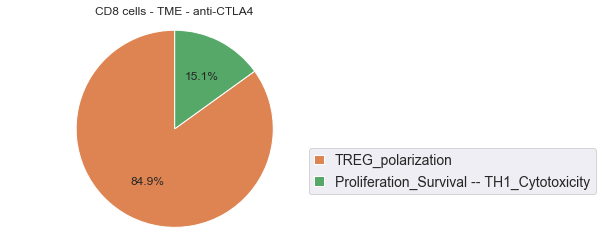

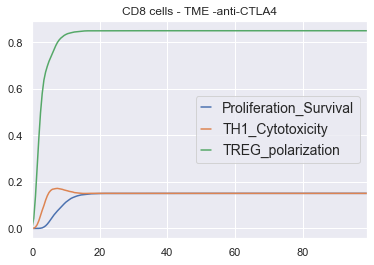

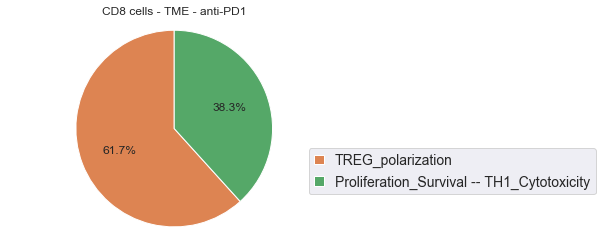

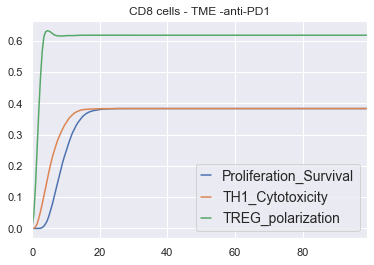

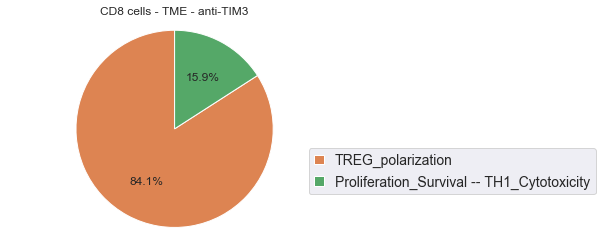

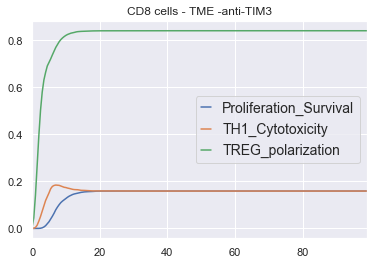

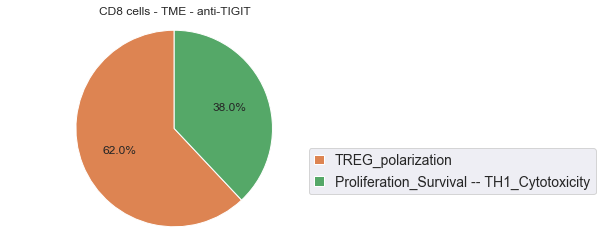

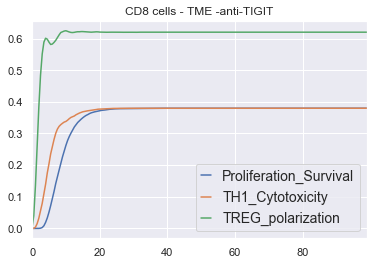

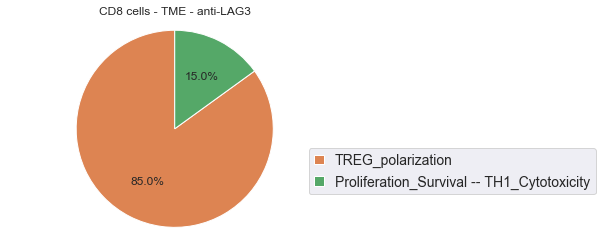

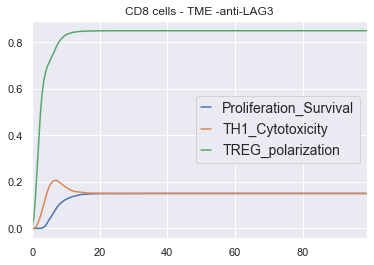

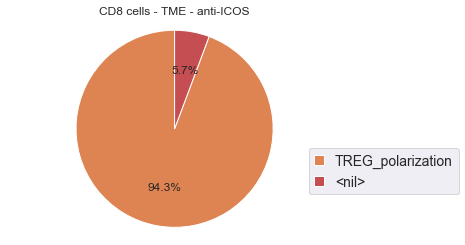

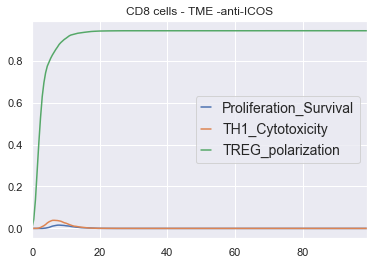

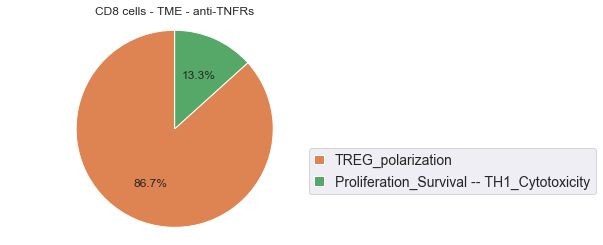

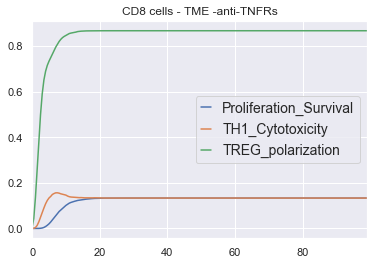

In [28]:
nodes_OFF = ['CTLA4','PD1','TIM3','TIGIT','LAG3','ICOS','TNFRs']

WT3_Tum_CD8.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))

# Simulate genes with loss of function
for mutant in nodes_OFF:
#    print(mutant, end=' ')
    mut_sim = WT3_Tum_CD8.copy()
    mut_sim.mutate(mutant, "OFF")
    mut_res = mut_sim.run()
    mut_res.plot_piechart(embed_labels=False, autopct=4)
    plt.title('CD8 cells - TME - ' + "anti-%s" % mutant)
    mut_res.get_nodes_probtraj().plot(legend=True)
    plt.title('CD8 cells - TME -' + "anti-%s" % mutant)

The most efficient treatment seems to be the anti-PD1 or anti-TIGIT treatments

Test for a third possible treatment in cells treated with anti-CTLA4 anti-PD1 treatments

Text(0.5, 1.0, 'CTLA4, PD1 and TIGIT OFF')

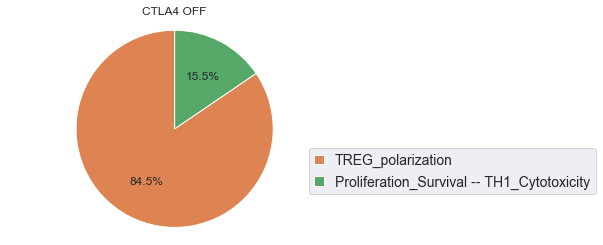

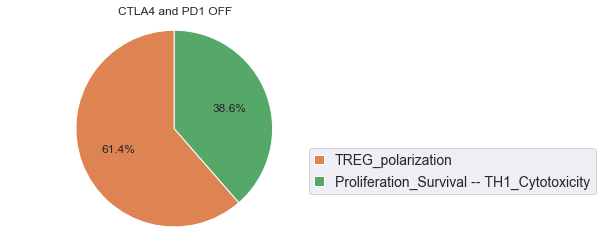

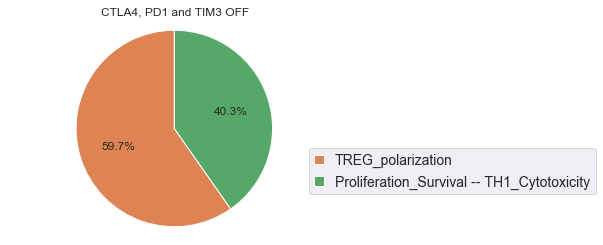

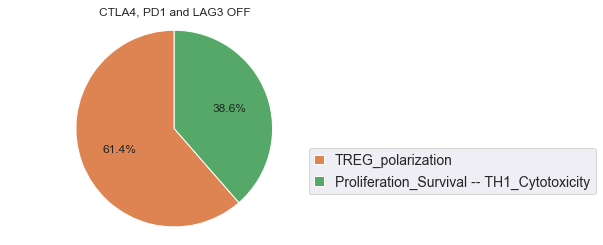

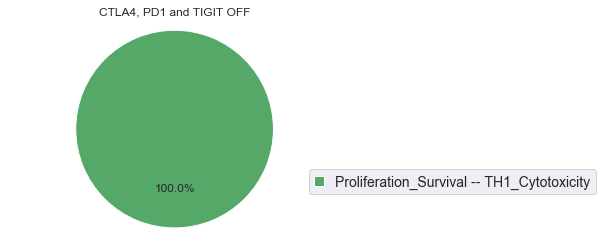

In [29]:
# Mutate CTLA4
mut_CTLA4_OFF = maboss.copy_and_update_parameters(WT3_Tum_CD8, {'max_time':50})

WT3_Tum_CD8_PD1_pos_IC.network.set_istate('Antigen',[0,1])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('MHCI',[0,1])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('MHCII',[1,0])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('CD80_86',[1,0])

WT3_Tum_CD8_PD1_pos_IC.network.set_istate('TIM3_L',[1,0])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('LAG3_L',[1,0])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('TIGIT_L',[1,0])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('PD1_L',[0,1])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('TNFRs_L',[0,1])
WT3_Tum_CD8_PD1_pos_IC.network.set_istate('ICOS_L',[0,1])

mut_CTLA4_OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_CTLA4_OFF.mutate("CTLA4", "OFF")
mutres_CTLA4_OFF = mut_CTLA4_OFF.run()
mutres_CTLA4_OFF.plot_piechart()
plt.title('CTLA4 OFF')
#mutres_CTLA4_OFF.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1
mut_PD1_CTLA4 = mut_CTLA4_OFF.copy()
mut_PD1_CTLA4.mutate("PD1", "OFF")
mutres_PD1_CTLA4 = mut_PD1_CTLA4.run()
mutres_PD1_CTLA4.plot_piechart()
plt.title('CTLA4 and PD1 OFF')
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1 and TIM3
mut_PD1_CTLA4_TIM3 = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TIM3.mutate("TIM3", "OFF")
mutres_PD1_CTLA4_TIM3 = mut_PD1_CTLA4_TIM3.run()
mutres_PD1_CTLA4_TIM3.plot_piechart()
plt.title('CTLA4, PD1 and TIM3 OFF')
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1 and LAG3
mut_PD1_CTLA4_LAG3 = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_LAG3.mutate("LAG3", "OFF")
mutres_PD1_CTLA4_LAG3 = mut_PD1_CTLA4_LAG3.run()
mutres_PD1_CTLA4_LAG3.plot_piechart()
plt.title('CTLA4, PD1 and LAG3 OFF')
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1 and TIGIT
mut_PD1_CTLA4_TIGIT = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TIGIT.mutate("TIGIT", "OFF")
mutres_PD1_CTLA4_TIGIT = mut_PD1_CTLA4_TIGIT.run()
mutres_PD1_CTLA4_TIGIT.plot_piechart()
plt.title('CTLA4, PD1 and TIGIT OFF')
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

Conclusion: The triple treatment, anti-CTLA4, anti-PD1, anti-TIGIT leads to full activation of Th1 cells

# 3a. Effect of the TF in the combinatory treatment in CD4 cells

Select the double treatment anti-PD1 anti-CTLA4 in CD4 cells with all cytokines initially OFF

Text(0.5, 1.0, 'CD4 cells - anti-CTLA4 - anti-PD1')

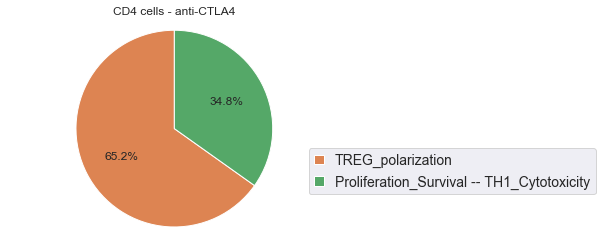

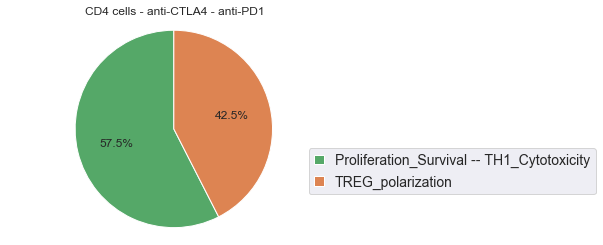

In [30]:
# Mutate CTLA4
mut_CTLA4_OFF = maboss.copy_and_update_parameters(WT3_Tum_CD4, {'max_time':50})

mut_CTLA4_OFF.network.set_istate('Antigen',[0,1])
mut_CTLA4_OFF.network.set_istate('MHCI',[1,0])
mut_CTLA4_OFF.network.set_istate('MHCII',[0,1])
mut_CTLA4_OFF.network.set_istate('CD80_86',[0,1])

mut_CTLA4_OFF.network.set_istate('TIM3_L',[0,1])
mut_CTLA4_OFF.network.set_istate('LAG3_L',[0,1])
mut_CTLA4_OFF.network.set_istate('TIGIT_L',[0,1])
mut_CTLA4_OFF.network.set_istate('PD1_L',[0,1])
mut_CTLA4_OFF.network.set_istate('TNFRs_L',[0,1])
mut_CTLA4_OFF.network.set_istate('ICOS_L',[0,1])

mut_CTLA4_OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_CTLA4_OFF.mutate("CTLA4", "OFF")
mutres_CTLA4_OFF = mut_CTLA4_OFF.run()
mutres_CTLA4_OFF.plot_piechart()
plt.title('CD4 cells - anti-CTLA4')
#mutres_CTLA4_OFF.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1
mut_PD1_CTLA4 = mut_CTLA4_OFF.copy()
mut_PD1_CTLA4.mutate("PD1", "OFF")
mutres_PD1_CTLA4 = mut_PD1_CTLA4.run()
mutres_PD1_CTLA4.plot_piechart()
plt.title('CD4 cells - anti-CTLA4 - anti-PD1')
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4
#mut_CTLA4_OFF = maboss.copy_and_update_parameters(WT3_Tum_CD4, {'max_time':50})
#mut_CTLA4_OFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
#mut_CTLA4_OFF.mutate("CTLA4", "OFF")
#mutres_CTLA4_OFF = mut_CTLA4_OFF.run()
#mutres_CTLA4_OFF.plot_piechart()
#mutres_CTLA4_OFF.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1
#mut_PD1_CTLA4 = mut_CTLA4_OFF.copy()
#mut_PD1_CTLA4.mutate("PD1", "OFF")
#mutres_PD1_CTLA4 = mut_PD1_CTLA4.run()
#mutres_PD1_CTLA4.plot_piechart()
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

##### Role of Tbet

Text(0.5, 1.0, 'PD1 / CTLA4 / Tbet OFF')

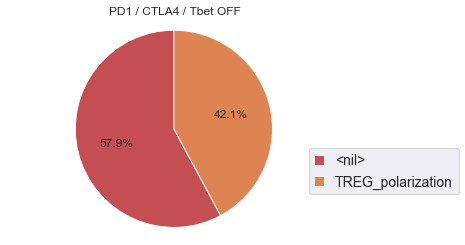

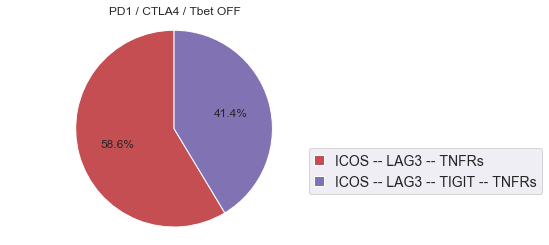

In [31]:
# Tbet OFF
mut_PD1_CTLA4_TbetOFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TbetOFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))

mut_PD1_CTLA4_TbetOFF.mutate("Tbet", "OFF")
mutres_PD1_CTLA4_TbetOFF = mut_PD1_CTLA4_TbetOFF.run()
mutres_PD1_CTLA4_TbetOFF.plot_piechart()
plt.title("PD1 / CTLA4 / Tbet OFF")

##
mut_PD1_CTLA4_TbetOFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TbetOFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_TbetOFF.mutate("Tbet", "OFF")
mutres_PD1_CTLA4_TbetOFF = mut_PD1_CTLA4_TbetOFF.run()
mutres_PD1_CTLA4_TbetOFF.plot_piechart()
plt.title("PD1 / CTLA4 / Tbet OFF")

Text(0.5, 1.0, 'PD1 / CTLA4 / Tbet ON')

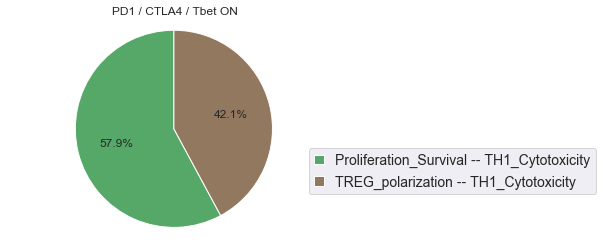

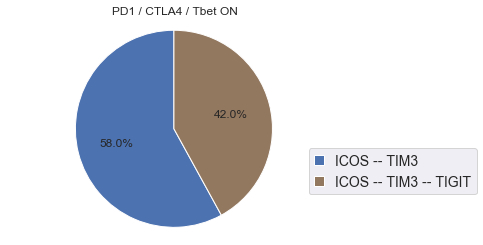

In [32]:
# Tbet ON
mut_PD1_CTLA4_TbetON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TbetON.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_TbetON.mutate("Tbet", "ON")
mutres_PD1_CTLA4_TbetON = mut_PD1_CTLA4_TbetON.run()
mutres_PD1_CTLA4_TbetON.plot_piechart()
plt.title("PD1 / CTLA4 / Tbet ON")

mut_PD1_CTLA4_TbetON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TbetON.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_TbetON.mutate("Tbet", "ON")
mutres_PD1_CTLA4_TbetON = mut_PD1_CTLA4_TbetON.run()
mutres_PD1_CTLA4_TbetON.plot_piechart()
plt.title("PD1 / CTLA4 / Tbet ON")

##### Role of FOXP3

Text(0.5, 1.0, 'PD1 / CTLA4 / FOXP3 OFF')

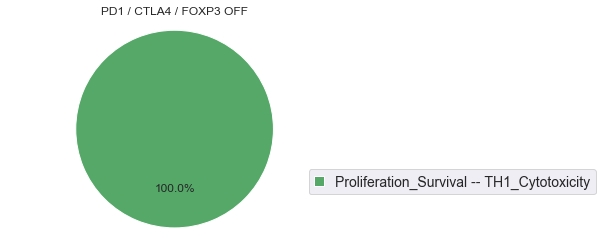

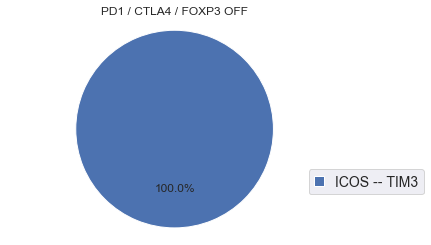

In [33]:
# FOXP3 OFF
mut_PD1_CTLA4_FOXP3OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXP3OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_FOXP3OFF.mutate("FOXP3", "OFF")
mutres_PD1_CTLA4_FOXP3OFF = mut_PD1_CTLA4_FOXP3OFF.run()
mutres_PD1_CTLA4_FOXP3OFF.plot_piechart()
plt.title("PD1 / CTLA4 / FOXP3 OFF")

mut_PD1_CTLA4_FOXP3OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXP3OFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_FOXP3OFF.mutate("FOXP3", "OFF")
mutres_PD1_CTLA4_FOXP3OFF = mut_PD1_CTLA4_FOXP3OFF.run()
mutres_PD1_CTLA4_FOXP3OFF.plot_piechart()
plt.title("PD1 / CTLA4 / FOXP3 OFF")

Text(0.5, 1.0, 'PD1 / CTLA4 / FOXP3 ON')

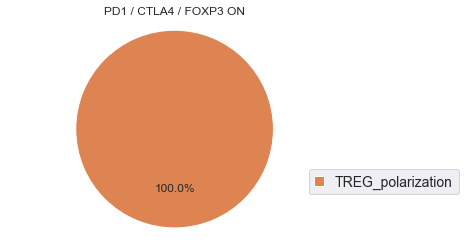

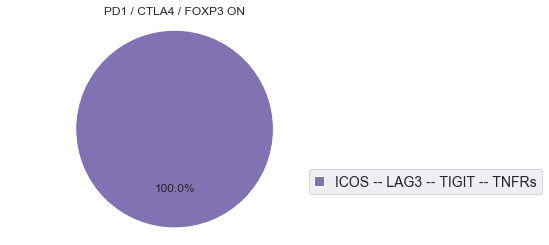

In [34]:
# FOXP3 ON
mut_PD1_CTLA4_FOXP3ON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXP3ON.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_FOXP3ON.mutate("FOXP3", "ON")
mutres_PD1_CTLA4_FOXP3ON = mut_PD1_CTLA4_FOXP3ON.run()
mutres_PD1_CTLA4_FOXP3ON.plot_piechart()
plt.title("PD1 / CTLA4 / FOXP3 ON")

# FOXP3 ON
mut_PD1_CTLA4_FOXP3ON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXP3ON.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_FOXP3ON.mutate("FOXP3", "ON")
mutres_PD1_CTLA4_FOXP3ON = mut_PD1_CTLA4_FOXP3ON.run()
mutres_PD1_CTLA4_FOXP3ON.plot_piechart()
plt.title("PD1 / CTLA4 / FOXP3 ON")

##### Role of FOXO1

Text(0.5, 1.0, 'PD1 / CTLA4 / FOXO1 OFF')

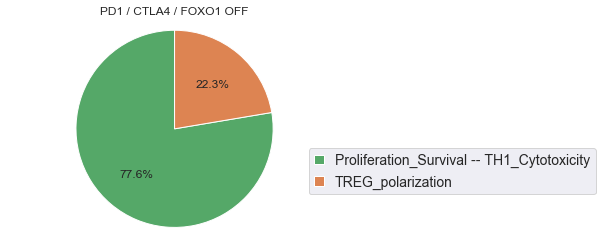

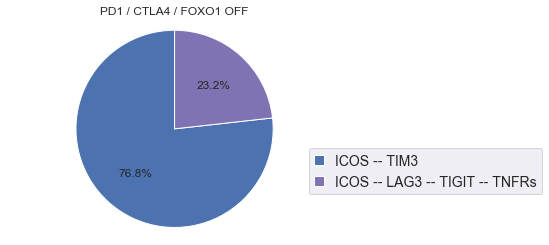

In [35]:
# FOXO1 OFF
mut_PD1_CTLA4_FOXO1OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXO1OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_FOXO1OFF.mutate("FOXO1", "OFF")
mutres_PD1_CTLA4_FOXO1OFF = mut_PD1_CTLA4_FOXO1OFF.run()
mutres_PD1_CTLA4_FOXO1OFF.plot_piechart()
plt.title("PD1 / CTLA4 / FOXO1 OFF")

# FOXO1 OFF
mut_PD1_CTLA4_FOXO1OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXO1OFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_FOXO1OFF.mutate("FOXO1", "OFF")
mutres_PD1_CTLA4_FOXO1OFF = mut_PD1_CTLA4_FOXO1OFF.run()
mutres_PD1_CTLA4_FOXO1OFF.plot_piechart()
plt.title("PD1 / CTLA4 / FOXO1 OFF")

Text(0.5, 1.0, 'PD1 / CTLA4 / FOXO1 ON')

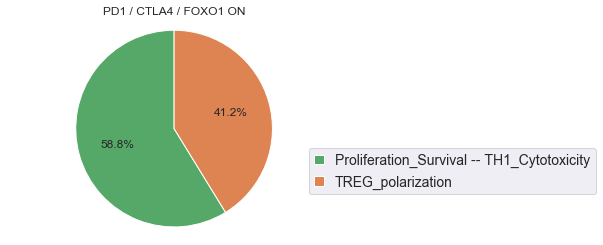

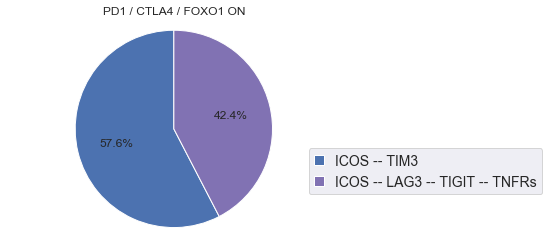

In [36]:
# FOXO1 ON
mut_PD1_CTLA4_FOXO1ON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXO1ON.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mutres_PD1_CTLA4_FOXO1ON = mut_PD1_CTLA4_FOXO1ON.run()
mutres_PD1_CTLA4_FOXO1ON.plot_piechart()
plt.title("PD1 / CTLA4 / FOXO1 ON")

# FOXO1 ON
mut_PD1_CTLA4_FOXO1ON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXO1ON.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mutres_PD1_CTLA4_FOXO1ON = mut_PD1_CTLA4_FOXO1ON.run()
mutres_PD1_CTLA4_FOXO1ON.plot_piechart()
plt.title("PD1 / CTLA4 / FOXO1 ON")

Results: FOXP3 and FOXO1 OFF seem to improve the response by increasing the proliferation of T-cells. They are good candidates to improve the response in the double treatment anti-PD1 / anti-CTLA4 in the TME

# 3b. Effect of the TF in the combinatory treatment in CD8+ cells

Select the double treatment anti-PD1 anti-CTLA4 in CD8 cells with all cytokines initially OFF

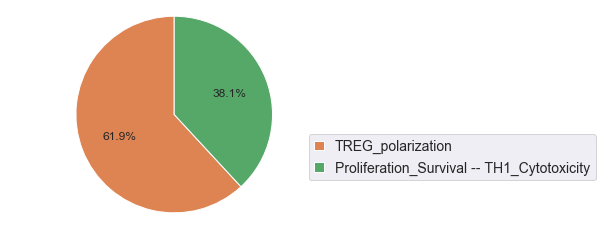

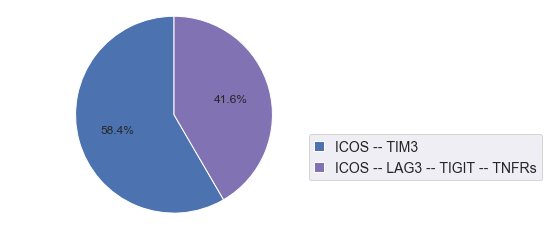

In [37]:
# Mutate CTLA4
mut_CTLA4_OFF = maboss.copy_and_update_parameters(WT3_Tum_CD8, {'max_time':50})

mut_CTLA4_OFF.network.set_istate('Antigen',[0,1])
mut_CTLA4_OFF.network.set_istate('MHCI',[0,1])
mut_CTLA4_OFF.network.set_istate('MHCII',[1,0])
mut_CTLA4_OFF.network.set_istate('CD80_86',[1,0])

mut_CTLA4_OFF.network.set_istate('TIM3_L',[0,1])
mut_CTLA4_OFF.network.set_istate('LAG3_L',[0,1])
mut_CTLA4_OFF.network.set_istate('TIGIT_L',[0,1])
mut_CTLA4_OFF.network.set_istate('PD1_L',[0,1])
mut_CTLA4_OFF.network.set_istate('TNFRs_L',[0,1])
mut_CTLA4_OFF.network.set_istate('ICOS_L',[0,1])

mut_CTLA4_OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_CTLA4_OFF.mutate("CTLA4", "OFF")
mutres_CTLA4_OFF = mut_CTLA4_OFF.run()
#mutres_CTLA4_OFF.plot_piechart()
#mutres_CTLA4_OFF.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1
mut_PD1_CTLA4 = mut_CTLA4_OFF.copy()
mut_PD1_CTLA4.mutate("PD1", "OFF")
mutres_PD1_CTLA4 = mut_PD1_CTLA4.run()
mutres_PD1_CTLA4.plot_piechart()
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4
mut_CTLA4_OFF = maboss.copy_and_update_parameters(WT3_Tum_CD4, {'max_time':50})
mut_CTLA4_OFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_CTLA4_OFF.mutate("CTLA4", "OFF")
mutres_CTLA4_OFF = mut_CTLA4_OFF.run()
#mutres_CTLA4_OFF.plot_piechart()
#mutres_CTLA4_OFF.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1
mut_PD1_CTLA4 = mut_CTLA4_OFF.copy()
mut_PD1_CTLA4.mutate("PD1", "OFF")
mutres_PD1_CTLA4 = mut_PD1_CTLA4.run()
mutres_PD1_CTLA4.plot_piechart()
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

##### Role of Tbet

Text(0.5, 1.0, 'PD1 / CTLA4 / Tbet OFF')

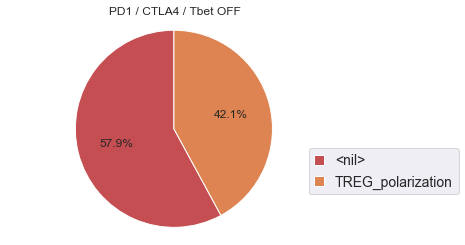

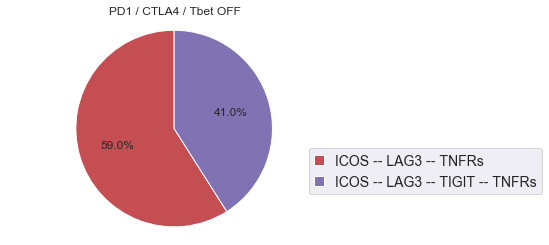

In [38]:
# Tbet OFF
mut_PD1_CTLA4_TbetOFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TbetOFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))

mut_PD1_CTLA4_TbetOFF.mutate("Tbet", "OFF")
mutres_PD1_CTLA4_TbetOFF = mut_PD1_CTLA4_TbetOFF.run()
mutres_PD1_CTLA4_TbetOFF.plot_piechart()
plt.title("PD1 / CTLA4 / Tbet OFF")

##
mut_PD1_CTLA4_TbetOFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TbetOFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_TbetOFF.mutate("Tbet", "OFF")
mutres_PD1_CTLA4_TbetOFF = mut_PD1_CTLA4_TbetOFF.run()
mutres_PD1_CTLA4_TbetOFF.plot_piechart()
plt.title("PD1 / CTLA4 / Tbet OFF")

Text(0.5, 1.0, 'PD1 / CTLA4 / Tbet ON')

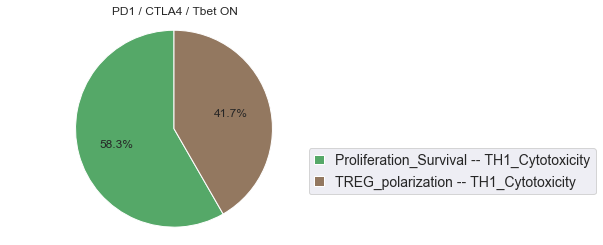

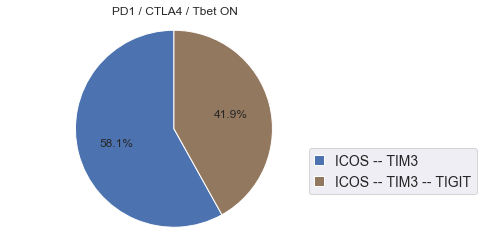

In [39]:
# Tbet ON
mut_PD1_CTLA4_TbetON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TbetON.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_TbetON.mutate("Tbet", "ON")
mutres_PD1_CTLA4_TbetON = mut_PD1_CTLA4_TbetON.run()
mutres_PD1_CTLA4_TbetON.plot_piechart()
plt.title("PD1 / CTLA4 / Tbet ON")

mut_PD1_CTLA4_TbetON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_TbetON.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_TbetON.mutate("Tbet", "ON")
mutres_PD1_CTLA4_TbetON = mut_PD1_CTLA4_TbetON.run()
mutres_PD1_CTLA4_TbetON.plot_piechart()
plt.title("PD1 / CTLA4 / Tbet ON")

#### Role of FOXP3

Text(0.5, 1.0, 'PD1 / CTLA4 / FOXP3 OFF')

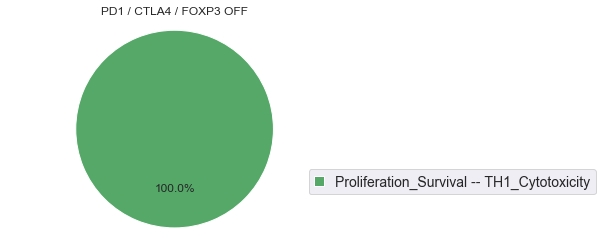

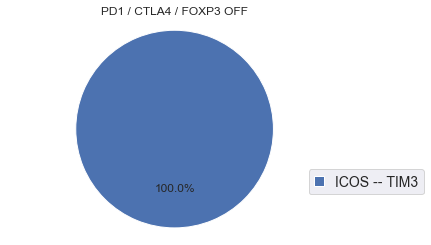

In [40]:
# FOXP3 OFF
mut_PD1_CTLA4_FOXP3OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXP3OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_FOXP3OFF.mutate("FOXP3", "OFF")
mutres_PD1_CTLA4_FOXP3OFF = mut_PD1_CTLA4_FOXP3OFF.run()
mutres_PD1_CTLA4_FOXP3OFF.plot_piechart()
plt.title("PD1 / CTLA4 / FOXP3 OFF")

mut_PD1_CTLA4_FOXP3OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXP3OFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_FOXP3OFF.mutate("FOXP3", "OFF")
mutres_PD1_CTLA4_FOXP3OFF = mut_PD1_CTLA4_FOXP3OFF.run()
mutres_PD1_CTLA4_FOXP3OFF.plot_piechart()
plt.title("PD1 / CTLA4 / FOXP3 OFF")

Text(0.5, 1.0, 'PD1 / CTLA4 / FOXP3 ON')

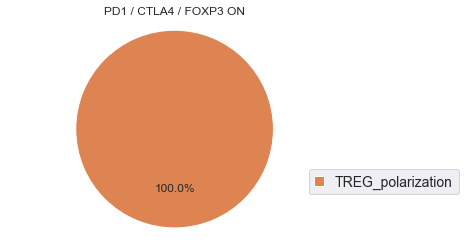

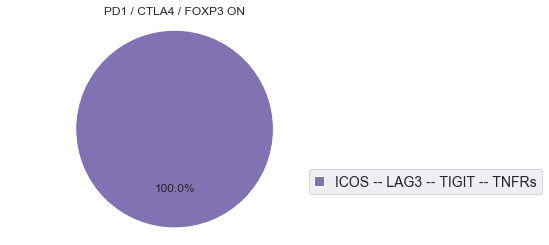

In [41]:
# FOXP3 ON
mut_PD1_CTLA4_FOXP3ON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXP3ON.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_FOXP3ON.mutate("FOXP3", "ON")
mutres_PD1_CTLA4_FOXP3ON = mut_PD1_CTLA4_FOXP3ON.run()
mutres_PD1_CTLA4_FOXP3ON.plot_piechart()
plt.title("PD1 / CTLA4 / FOXP3 ON")

# FOXP3 ON
mut_PD1_CTLA4_FOXP3ON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXP3ON.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_FOXP3ON.mutate("FOXP3", "ON")
mutres_PD1_CTLA4_FOXP3ON = mut_PD1_CTLA4_FOXP3ON.run()
mutres_PD1_CTLA4_FOXP3ON.plot_piechart()
plt.title("PD1 / CTLA4 / FOXP3 ON")

#### Role of FOXO1

Text(0.5, 1.0, 'PD1 / CTLA4 / FOXO1 OFF')

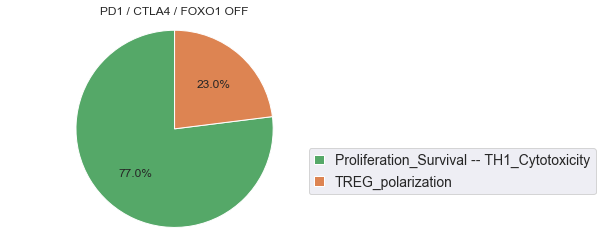

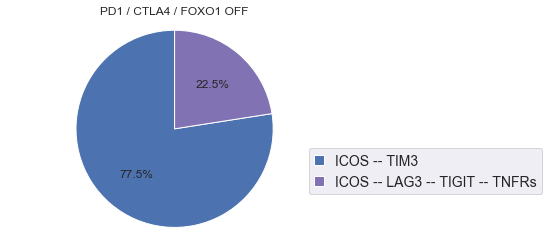

In [42]:
# FOXO1 OFF
mut_PD1_CTLA4_FOXO1OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXO1OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_FOXO1OFF.mutate("FOXO1", "OFF")
mutres_PD1_CTLA4_FOXO1OFF = mut_PD1_CTLA4_FOXO1OFF.run()
mutres_PD1_CTLA4_FOXO1OFF.plot_piechart()
plt.title("PD1 / CTLA4 / FOXO1 OFF")

# FOXO1 OFF
mut_PD1_CTLA4_FOXO1OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXO1OFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_FOXO1OFF.mutate("FOXO1", "OFF")
mutres_PD1_CTLA4_FOXO1OFF = mut_PD1_CTLA4_FOXO1OFF.run()
mutres_PD1_CTLA4_FOXO1OFF.plot_piechart()
plt.title("PD1 / CTLA4 / FOXO1 OFF")

Text(0.5, 1.0, 'PD1 / CTLA4 / FOXO1 ON')

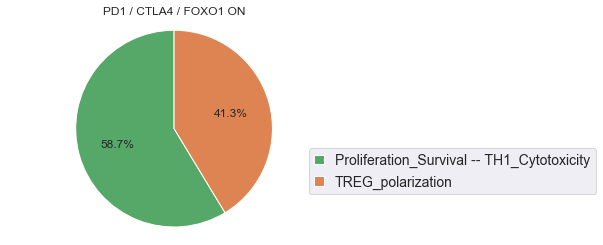

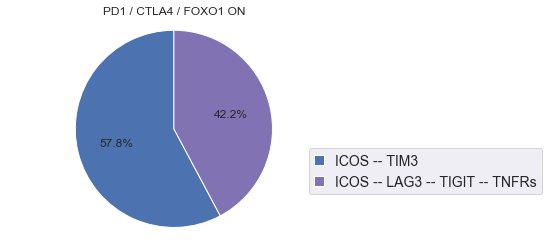

In [43]:
# FOXO1 ON
mut_PD1_CTLA4_FOXO1ON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXO1ON.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mutres_PD1_CTLA4_FOXO1ON = mut_PD1_CTLA4_FOXO1ON.run()
mutres_PD1_CTLA4_FOXO1ON.plot_piechart()
plt.title("PD1 / CTLA4 / FOXO1 ON")

# FOXO1 ON
mut_PD1_CTLA4_FOXO1ON = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_FOXO1ON.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mutres_PD1_CTLA4_FOXO1ON = mut_PD1_CTLA4_FOXO1ON.run()
mutres_PD1_CTLA4_FOXO1ON.plot_piechart()
plt.title("PD1 / CTLA4 / FOXO1 ON")

Since the cytokines are able to modulate the activity of the transcription factors, we explore the effect of their presence in the TME 

# 4. Effect of the cytokines in the combinatory treatment in CD4+ cells

To simulate CD8 cells, modify below the model name 'WT3_Tum_CD4'by 'WT3_Tum_CD8'

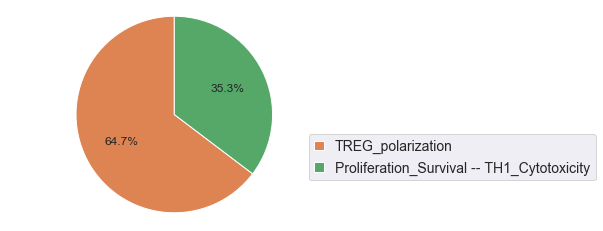

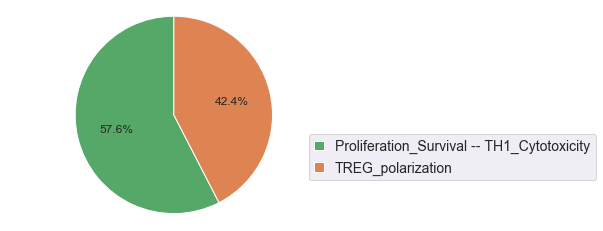

In [44]:
# Mutate CTLA4
mut_CTLA4_OFF = maboss.copy_and_update_parameters(WT3_Tum_CD4, {'max_time':50})

mut_CTLA4_OFF.network.set_istate('Antigen',[0,1])
mut_CTLA4_OFF.network.set_istate('MHCI',[1,0])
mut_CTLA4_OFF.network.set_istate('MHCII',[0,1])
mut_CTLA4_OFF.network.set_istate('CD80_86',[0,1])

mut_CTLA4_OFF.network.set_istate('TIM3_L',[0,1])
mut_CTLA4_OFF.network.set_istate('LAG3_L',[0,1])
mut_CTLA4_OFF.network.set_istate('TIGIT_L',[0,1])
mut_CTLA4_OFF.network.set_istate('PD1_L',[0,1])
mut_CTLA4_OFF.network.set_istate('TNFRs_L',[0,1])
mut_CTLA4_OFF.network.set_istate('ICOS_L',[0,1])


mut_CTLA4_OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_CTLA4_OFF.mutate("CTLA4", "OFF")
mutres_CTLA4_OFF = mut_CTLA4_OFF.run()
mutres_CTLA4_OFF.plot_piechart()
#mutres_CTLA4_OFF.get_nodes_probtraj().plot(legend=True)

# Mutate CTLA4 and PD1
mut_PD1_CTLA4 = mut_CTLA4_OFF.copy()
mut_PD1_CTLA4.mutate("PD1", "OFF")
mutres_PD1_CTLA4 = mut_PD1_CTLA4.run()
mutres_PD1_CTLA4.plot_piechart()
#mutres_PD1_CTLA4.get_nodes_probtraj().plot(legend=True)

### Simulations of the activation of cytokines one by one

Text(0.5, 1.0, 'IFNG ON only')

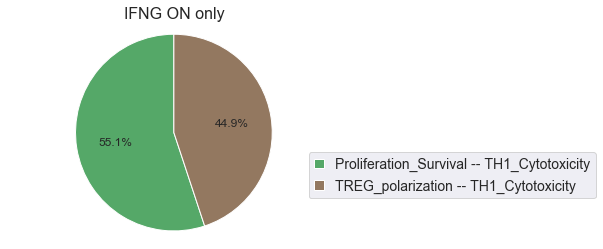

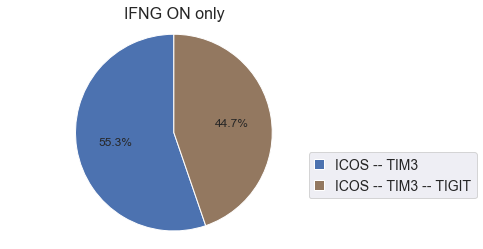

In [45]:
#### IFNG ONLY

WT3a = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3a.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3a.network.set_istate('IFNG', [0,1])
WT3a.network.set_istate('TGFb', [1,0])
WT3a.network.set_istate('IL27', [1,0])

# Run the model
run_WT3a = WT3a.run()

# Plot the results of the WT simulation
#run_WT3a.get_nodes_probtraj().plot(legend=True)
#plt.title("IFG ON only")
run_WT3a.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("IFNG ON only", fontsize=16)

###############
WT3a = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3a.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3a.network.set_istate('IFNG', [0,1])
WT3a.network.set_istate('TGFb', [1,0])
WT3a.network.set_istate('IL27', [1,0])

# Run the model
run_WT3a = WT3a.run()

# Plot the results of the WT simulation
#run_WT3a.get_nodes_probtraj().plot(legend=True)
#plt.title("IFG ON only")
run_WT3a.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("IFNG ON only", fontsize=16)

#WT3a.print_cfg()

Text(0.5, 1.0, 'IL27 ON only')

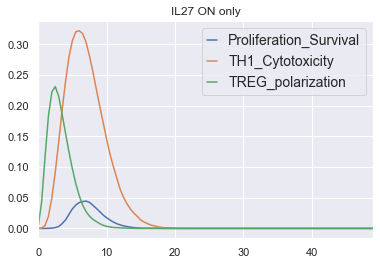

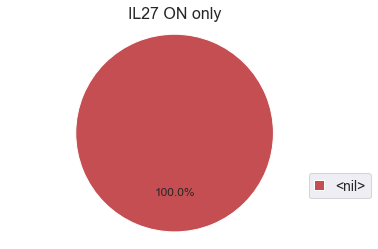

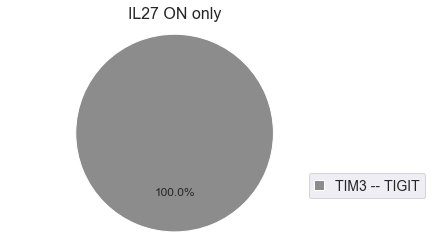

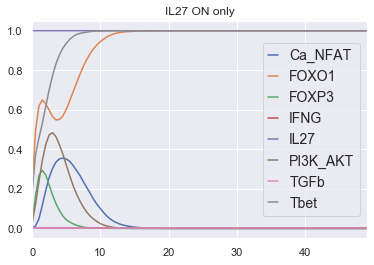

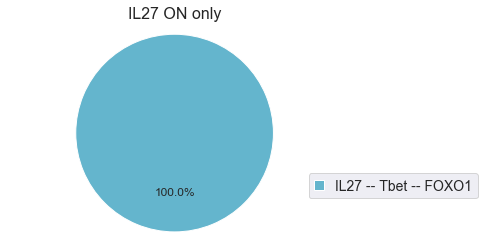

In [46]:
## IL27
WT3b = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3b.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3b.network.set_istate('IFNG', [1,0])
WT3b.network.set_istate('TGFb', [1,0])
WT3b.network.set_istate('IL27', [0,1])

run_WT3b = WT3b.run()

# Plot the results of the WT simulation
run_WT3b.get_nodes_probtraj().plot(legend=True)
plt.title("IL27 ON only")
run_WT3b.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("IL27 ON only",fontsize=16)

#######
WT3b = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3b.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3b.network.set_istate('IFNG', [1,0])
WT3b.network.set_istate('TGFb', [1,0])
WT3b.network.set_istate('IL27', [0,1])

run_WT3b = WT3b.run()

# Plot the results of the WT simulation
#run_WT3b.get_nodes_probtraj().plot(legend=True)
#plt.title("IL27 ON only")
run_WT3b.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("IL27 ON only",fontsize=16)

#############

WT3b = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3b.network.set_output(('Tbet', 'FOXP3','FOXO1','IL27','TGFb','IFNG', 'Ca_NFAT','PI3K_AKT'))

WT3b.network.set_istate('IFNG', [1,0])
WT3b.network.set_istate('TGFb', [1,0])
WT3b.network.set_istate('IL27', [0,1])

run_WT3b = WT3b.run()

# Plot the results of the WT simulation
run_WT3b.get_nodes_probtraj().plot(legend=True)
plt.title("IL27 ON only")
run_WT3b.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("IL27 ON only",fontsize=16)


Text(0.5, 1.0, 'TGFb ON only')

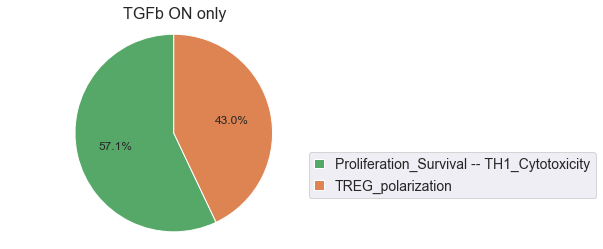

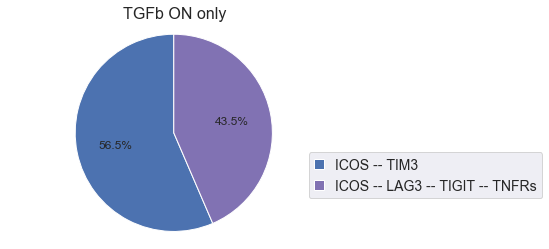

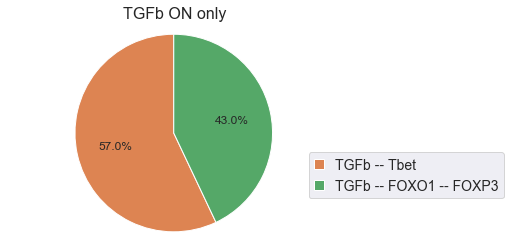

In [47]:
## TGFb ON
WT3c = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3c.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3c.network.set_istate('IFNG', [1,0])
WT3c.network.set_istate('TGFb', [0,1])
WT3c.network.set_istate('IL27', [1,0])

run_WT3c = WT3c.run()

# Plot the results of the WT simulation
#run_WT3c.get_nodes_probtraj().plot(legend=True)
#plt.title("TGFb ON only")
run_WT3c.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("TGFb ON only",fontsize=16)

######
WT3c = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3c.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3c.network.set_istate('IFNG', [1,0])
WT3c.network.set_istate('TGFb', [0,1])
WT3c.network.set_istate('IL27', [1,0])

run_WT3c = WT3c.run()

# Plot the results of the WT simulation
#run_WT3c.get_nodes_probtraj().plot(legend=True)
#plt.title("TGFb ON only")
run_WT3c.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("TGFb ON only",fontsize=16)

WT3c = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3c.network.set_output(('Tbet', 'FOXP3','FOXO1','IL27','TGFb','IFNG'))

WT3c.network.set_istate('IFNG', [1,0])
WT3c.network.set_istate('TGFb', [0,1])
WT3c.network.set_istate('IL27', [1,0])

run_WT3c = WT3c.run()

# Plot the results of the WT simulation
#run_WT3c.get_nodes_probtraj().plot(legend=True)
#plt.title("TGFb ON only")
run_WT3c.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("TGFb ON only",fontsize=16)


Results:

Text(0.5, 1.0, 'IL12 ON only')

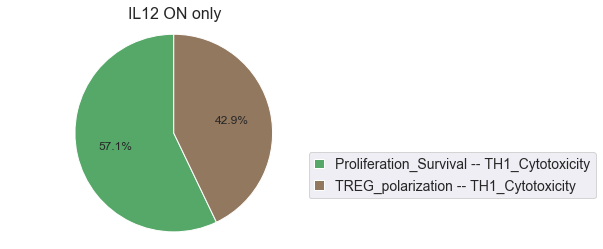

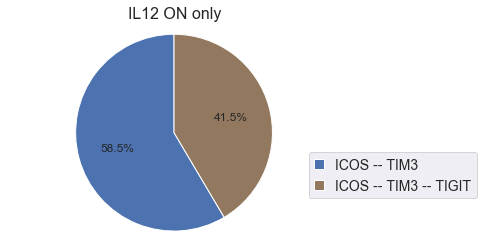

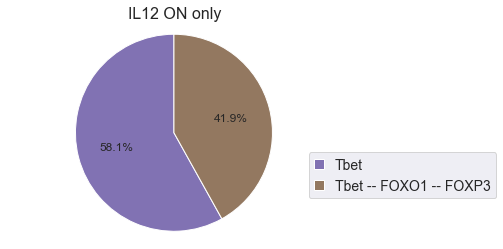

In [48]:
## IL12 ON
WT3c_bis = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3c_bis.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3c_bis.network.set_istate('IFNG', [1,0])
WT3c_bis.network.set_istate('TGFb', [1,0])
WT3c_bis.network.set_istate('IL27', [1,0])
WT3c_bis.network.set_istate('IL12', [0,1])

run_WT3c_bis = WT3c_bis.run()

# Plot the results of the WT simulation
#run_WT3c_bis.get_nodes_probtraj().plot(legend=True)
#plt.title("TGFb ON only")
run_WT3c_bis.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("IL12 ON only",fontsize=16)

######
WT3c_bis = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3c_bis.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3c_bis.network.set_istate('IFNG', [1,0])
WT3c_bis.network.set_istate('TGFb', [1,0])
WT3c_bis.network.set_istate('IL27', [1,0])
WT3c_bis.network.set_istate('IL12', [0,1])


run_WT3c_bis = WT3c_bis.run()

# Plot the results of the WT simulation
#run_WT3c_bis.get_nodes_probtraj().plot(legend=True)
#plt.title("TGFb ON only")
run_WT3c_bis.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("IL12 ON only",fontsize=16)

WT3c_bis = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3c_bis.network.set_output(('Tbet', 'FOXP3','FOXO1','IL27','TGFb','IFNG'))

WT3c_bis.network.set_istate('IFNG', [1,0])
WT3c_bis.network.set_istate('TGFb', [1,0])
WT3c_bis.network.set_istate('IL27', [1,0])
WT3c_bis.network.set_istate('IL12', [0,1])


run_WT3c_bis = WT3c_bis.run()

# Plot the results of the WT simulation
#run_WT3c_bis.get_nodes_probtraj().plot(legend=True)
#plt.title("TGFb ON only")
run_WT3c_bis.plot_piechart()
params = {'legend.fontsize': 14,
          'legend.handlelength': 0.7}
plt.rcParams.update(params)
plt.title("IL12 ON only",fontsize=16)


### Combination of inputs

#### IL27 + TGFb

Text(0.5, 1.0, 'IL27 ON - TGFb ON')

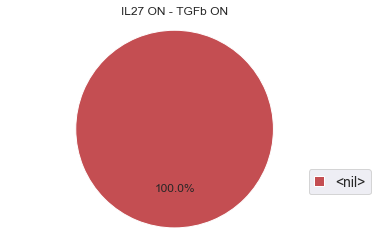

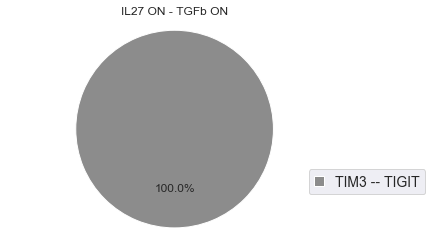

In [49]:
# Load the Wild-Type model
WT3d = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3d.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3d.network.set_istate('IFNG', [1,0])
WT3d.network.set_istate('TGFb', [0,1])
WT3d.network.set_istate('IL27', [0,1])

run_WT3d = WT3d.run()

# Plot the results of the WT simulation
#run_WT3d.get_nodes_probtraj().plot(legend=True)
#plt.title("IL27 ON - TGFb ON")
run_WT3d.plot_piechart()
plt.title("IL27 ON - TGFb ON")


############
WT3d.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
WT3d.network.set_istate('IFNG', [1,0])
WT3d.network.set_istate('TGFb', [0,1])
WT3d.network.set_istate('IL27', [0,1])

run_WT3d = WT3d.run()

# Plot the results of the WT simulation
#run_WT3d.get_nodes_probtraj().plot(legend=True)
#plt.title("IL27 ON - TGFb ON")
run_WT3d.plot_piechart()
plt.title("IL27 ON - TGFb ON")

#### IL27 + IFNG

Text(0.5, 1.0, 'IL27 ON - IFNG ON')

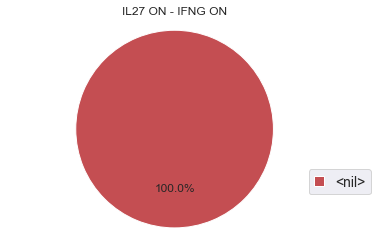

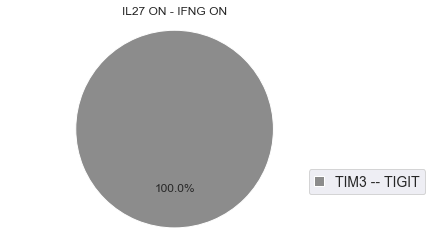

In [50]:
## IL27 + IFNg

WT3d = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3d.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3d.network.set_istate('IFNG', [0,1])
WT3d.network.set_istate('TGFb', [1,0])
WT3d.network.set_istate('IL27', [0,1])

run_WT3d = WT3d.run()

# Plot the results of the WT simulation
#run_WT3d.get_nodes_probtraj().plot(legend=True)
#plt.title("IL27 ON - IFNg ON")
run_WT3d.plot_piechart()
plt.title("IL27 ON - IFNG ON")


##########
WT3d = maboss.copy_and_update_parameters(mut_PD1_CTLA4, {'max_time':50})

WT3d.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3d.network.set_istate('IFNG', [0,1])
WT3d.network.set_istate('TGFb', [1,0])
WT3d.network.set_istate('IL27', [0,1])

run_WT3d = WT3d.run()

# Plot the results of the WT simulation
#run_WT3d.get_nodes_probtraj().plot(legend=True)
#plt.title("IL27 ON - IFNg ON")
run_WT3d.plot_piechart()
plt.title("IL27 ON - IFNG ON")

### Effect of the STAT1 and STAT3 status in the response of the treatment with cytokines ON

#### STAT3 OFF only in double treated cells

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT3 OFF')

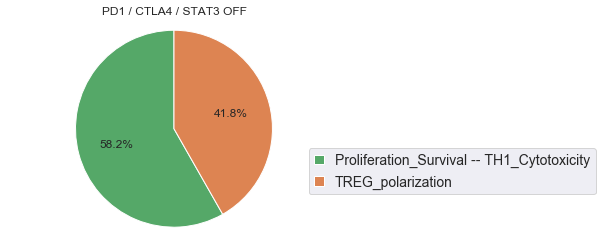

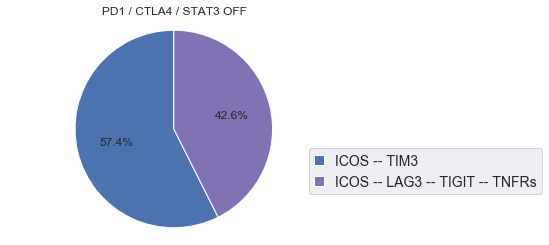

In [51]:
# STAT3 OFF
mut_PD1_CTLA4_STAT3OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_STAT3OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_STAT3OFF.mutate("STAT3", "OFF")
mutres_PD1_CTLA4_STAT3OFF = mut_PD1_CTLA4_STAT3OFF.run()
mutres_PD1_CTLA4_STAT3OFF.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF")

# STAT3 OFF
mut_PD1_CTLA4_STAT3OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_STAT3OFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_STAT3OFF.mutate("STAT3", "OFF")
mutres_PD1_CTLA4_STAT3OFF = mut_PD1_CTLA4_STAT3OFF.run()
mutres_PD1_CTLA4_STAT3OFF.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF")

#### STAT3 OFF in double treatment with TGFb ON

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT3 OFF - TGFb ON')

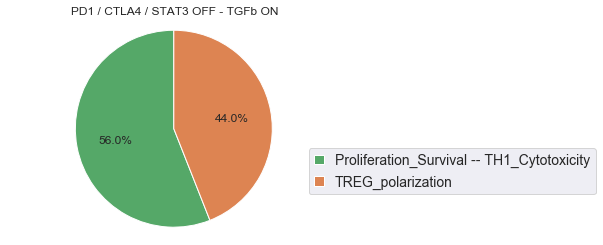

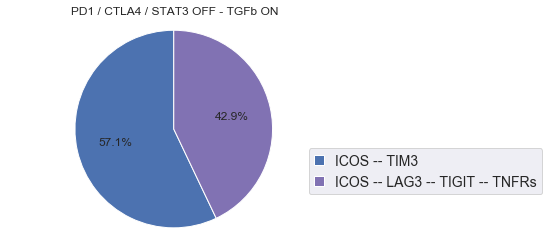

In [52]:
WT3e = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT3OFF, {'max_time':50})

WT3e.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3e.network.set_istate('IFNG', [1,0])
WT3e.network.set_istate('TGFb', [0,1])
WT3e.network.set_istate('IL27', [1,0])

run_WT3e = WT3e.run()

# Plot the results of the WT simulation
#run_WT3e.get_nodes_probtraj().plot(legend=True)
run_WT3e.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF - TGFb ON")


##########
WT3e = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT3OFF, {'max_time':50})

WT3e.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3e.network.set_istate('IFNG', [1,0])
WT3e.network.set_istate('TGFb', [0,1])
WT3e.network.set_istate('IL27', [1,0])

run_WT3e = WT3e.run()

# Plot the results of the WT simulation
#run_WT3e.get_nodes_probtraj().plot(legend=True)
run_WT3e.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF - TGFb ON")

#### STAT3 OFF in double treatment with IFNG ON

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT3 OFF - IFNG ON')

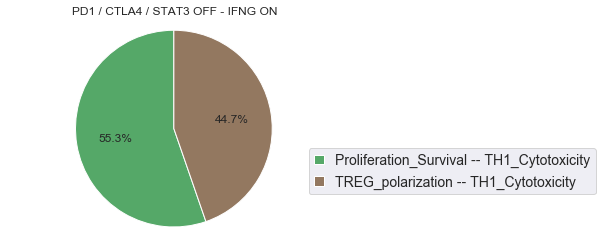

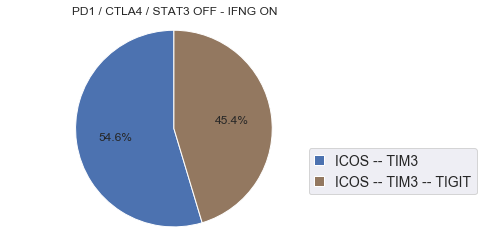

In [53]:
WT3f = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT3OFF, {'max_time':50})

WT3f.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3f.network.set_istate('IFNG', [0,1])
WT3f.network.set_istate('TGFb', [1,0])
WT3f.network.set_istate('IL27', [1,0])

run_WT3f = WT3f.run()

# Plot the results of the WT simulation
#run_WT3f.get_nodes_probtraj().plot(legend=True)
run_WT3f.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF - IFNG ON")


##########
WT3f = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT3OFF, {'max_time':50})

WT3f.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3f.network.set_istate('IFNG', [0,1])
WT3f.network.set_istate('TGFb', [1,0])
WT3f.network.set_istate('IL27', [1,0])

run_WT3f = WT3f.run()

# Plot the results of the WT simulation
#run_WT3f.get_nodes_probtraj().plot(legend=True)
run_WT3f.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF - IFNG ON")

#### STAT3 OFF in double treatment with IL27 ON

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT3 OFF - IL27 ON')

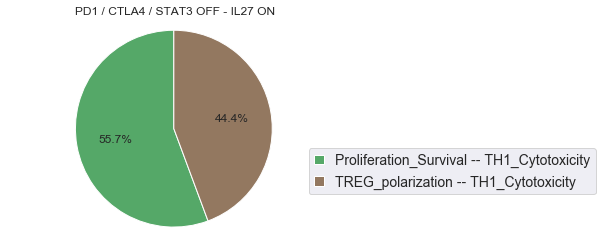

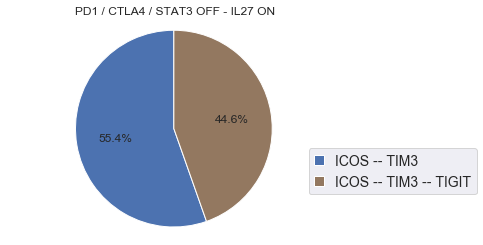

In [54]:
WT3g = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT3OFF, {'max_time':50})

WT3g.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3g.network.set_istate('IFNG', [1,0])
WT3g.network.set_istate('TGFb', [1,0])
WT3g.network.set_istate('IL27', [0,1])

run_WT3g = WT3g.run()

# Plot the results of the WT simulation
#run_WT3g.get_nodes_probtraj().plot(legend=True)
run_WT3g.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF - IL27 ON")


##########
WT3g = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT3OFF, {'max_time':50})

WT3g.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3g.network.set_istate('IFNG', [1,0])
WT3g.network.set_istate('TGFb', [1,0])
WT3g.network.set_istate('IL27', [0,1])

run_WT3g = WT3g.run()

# Plot the results of the WT simulation
#run_WT3g.get_nodes_probtraj().plot(legend=True)
run_WT3g.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF - IL27 ON")

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT3 OFF - IL12 ON')

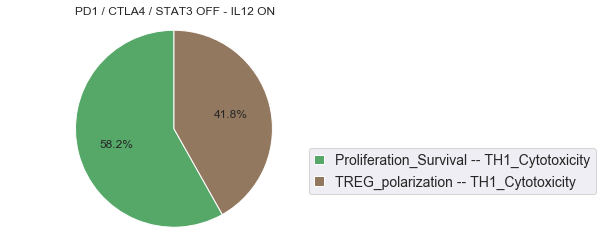

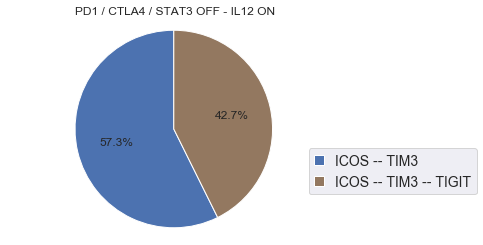

In [55]:
WT3g_bis = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT3OFF, {'max_time':50})

WT3g_bis.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3g_bis.network.set_istate('IFNG', [1,0])
WT3g_bis.network.set_istate('TGFb', [1,0])
WT3g_bis.network.set_istate('IL27', [1,0])
WT3g_bis.network.set_istate('IL12', [0,1])


run_WT3g_bis = WT3g_bis.run()

# Plot the results of the WT simulation
#run_WT3g_bis.get_nodes_probtraj().plot(legend=True)
run_WT3g_bis.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF - IL12 ON")


##########
WT3g_bis = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT3OFF, {'max_time':50})

WT3g_bis.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3g_bis.network.set_istate('IFNG', [1,0])
WT3g_bis.network.set_istate('TGFb', [1,0])
WT3g_bis.network.set_istate('IL27', [1,0])
WT3g_bis.network.set_istate('IL12', [0,1])

run_WT3g_bis = WT3g_bis.run()

# Plot the results of the WT simulation
#run_WT3g_bis.get_nodes_probtraj().plot(legend=True)
run_WT3g_bis.plot_piechart()
plt.title("PD1 / CTLA4 / STAT3 OFF - IL12 ON")

#### STAT1 OFF only in double treatment

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT1 OFF')

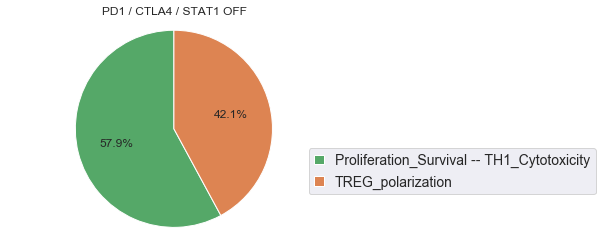

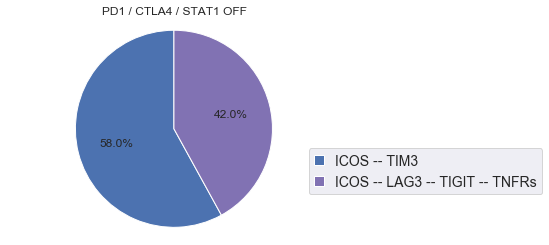

In [56]:
# STAT1 OFF
mut_PD1_CTLA4_STAT1OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_STAT1OFF.network.set_output(('Proliferation_Survival','TH1_Cytotoxicity', 'TREG_polarization'))
mut_PD1_CTLA4_STAT1OFF.mutate("STAT1", "OFF")
mutres_PD1_CTLA4_STAT1OFF = mut_PD1_CTLA4_STAT1OFF.run()
mutres_PD1_CTLA4_STAT1OFF.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF")

# STAT1 OFF
mut_PD1_CTLA4_STAT1OFF = mut_PD1_CTLA4.copy()
mut_PD1_CTLA4_STAT1OFF.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))
mut_PD1_CTLA4_STAT1OFF.mutate("STAT1", "OFF")
mutres_PD1_CTLA4_STAT1OFF = mut_PD1_CTLA4_STAT1OFF.run()
mutres_PD1_CTLA4_STAT1OFF.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF")

#### STAT1 OFF in double treatment with TGFb ON

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT1 OFF - TGFb ON')

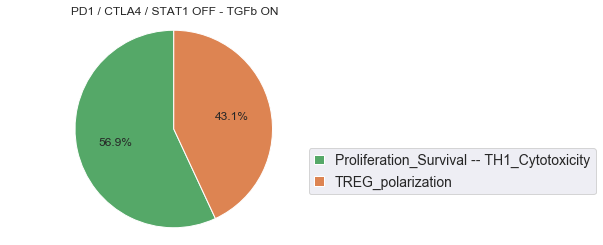

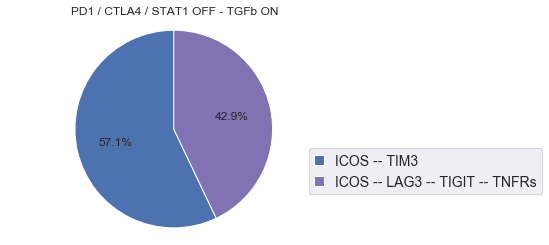

In [57]:
WT3h = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT1OFF, {'max_time':50})

WT3h.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3h.network.set_istate('IFNG', [1,0])
WT3h.network.set_istate('TGFb', [0,1])
WT3h.network.set_istate('IL27', [1,0])

run_WT3h = WT3h.run()

# Plot the results of the WT simulation
#run_WT3h.get_nodes_probtraj().plot(legend=True)
run_WT3h.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF - TGFb ON")


##########
WT3h = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT1OFF, {'max_time':50})

WT3h.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3h.network.set_istate('IFNG', [1,0])
WT3h.network.set_istate('TGFb', [0,1])
WT3h.network.set_istate('IL27', [1,0])

run_WT3h = WT3h.run()

# Plot the results of the WT simulation
#run_WT3h.get_nodes_probtraj().plot(legend=True)
run_WT3h.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF - TGFb ON")

#### STAT1 OFF in double treatment with IFNG ON

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT1 OFF - IFNG ON')

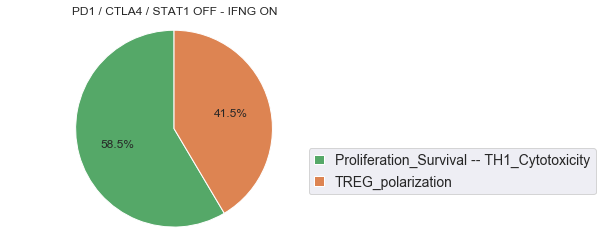

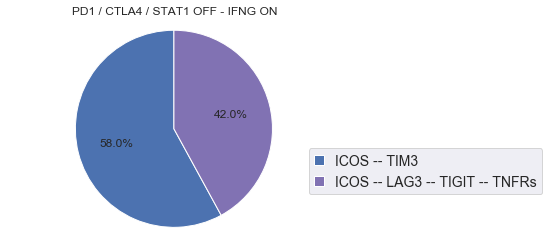

In [58]:
WT3i = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT1OFF, {'max_time':50})

WT3i.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3i.network.set_istate('IFNG', [0,1])
WT3i.network.set_istate('TGFb', [1,0])
WT3i.network.set_istate('IL27', [1,0])

run_WT3i = WT3i.run()

# Plot the results of the WT simulation
#run_WT3i.get_nodes_probtraj().plot(legend=True)
run_WT3i.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF - IFNG ON")


##########
WT3i = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT1OFF, {'max_time':50})

WT3i.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3i.network.set_istate('IFNG', [0,1])
WT3i.network.set_istate('TGFb', [1,0])
WT3i.network.set_istate('IL27', [1,0])

run_WT3i = WT3i.run()

# Plot the results of the WT simulation
#run_WT3i.get_nodes_probtraj().plot(legend=True)
run_WT3i.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF - IFNG ON")

#### STAT1 OFF in double treatment with IL27 ON

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT1 OFF - IL27 ON')

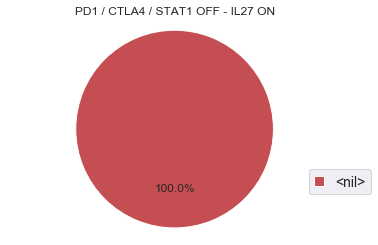

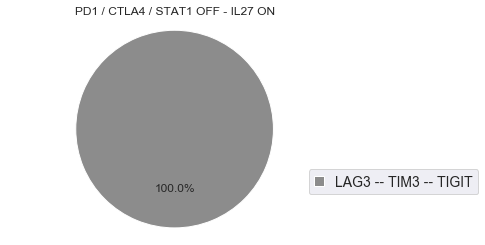

In [59]:
WT3j = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT1OFF, {'max_time':50})

WT3j.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3j.network.set_istate('IFNG', [1,0])
WT3j.network.set_istate('TGFb', [1,0])
WT3j.network.set_istate('IL27', [0,1])

run_WT3j = WT3j.run()

# Plot the results of the WT simulation
#run_WT3j.get_nodes_probtraj().plot(legend=True)
run_WT3j.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF - IL27 ON")


##########
WT3j = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT1OFF, {'max_time':50})

WT3j.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3j.network.set_istate('IFNG', [1,0])
WT3j.network.set_istate('TGFb', [0,1])
WT3j.network.set_istate('IL27', [0,1])

run_WT3j = WT3j.run()

# Plot the results of the WT simulation
#run_WT3j.get_nodes_probtraj().plot(legend=True)
run_WT3j.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF - IL27 ON")

Text(0.5, 1.0, 'PD1 / CTLA4 / STAT1 OFF - IL12 ON')

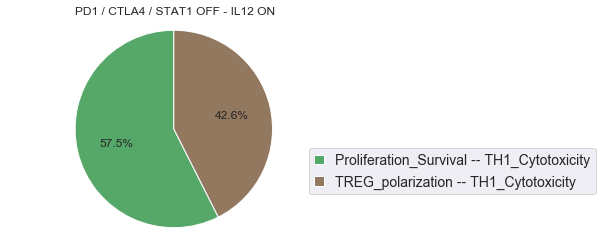

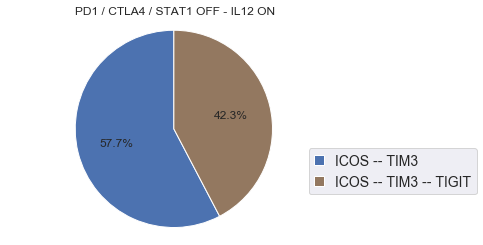

In [60]:
WT3k_bis = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT1OFF, {'max_time':50})

WT3k_bis.network.set_output(('TH1_Cytotoxicity', 'TREG_polarization','Proliferation_Survival'))

WT3k_bis.network.set_istate('IFNG', [1,0])
WT3k_bis.network.set_istate('TGFb', [1,0])
WT3k_bis.network.set_istate('IL27', [1,0])
WT3k_bis.network.set_istate('IL12', [0,1])


run_WT3k_bis = WT3k_bis.run()

# Plot the results of the WT simulation
#run_WT3k_bis.get_nodes_probtraj().plot(legend=True)
run_WT3k_bis.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF - IL12 ON")


##########
WT3k_bis = maboss.copy_and_update_parameters(mut_PD1_CTLA4_STAT1OFF, {'max_time':50})

WT3k_bis.network.set_output(('PD1', 'CTLA4','TIM3','LAG3','TIGIT','ICOS','TNFRs'))

WT3k_bis.network.set_istate('IFNG', [1,0])
WT3k_bis.network.set_istate('TGFb', [1,0])
WT3k_bis.network.set_istate('IL27', [1,0])
WT3k_bis.network.set_istate('IL12', [0,1])

run_WT3k_bis = WT3k_bis.run()

# Plot the results of the WT simulation
#run_WT3k_bis.get_nodes_probtraj().plot(legend=True)
run_WT3k_bis.plot_piechart()
plt.title("PD1 / CTLA4 / STAT1 OFF - IL12 ON")
